Genome tags:

1058: Unintentionally funny 

933: So bad its funny

934: So bad its good

891: Scifi cult

616: Low budget

274: Cult

275: Cult classic

276: Cult film

198: Cheesy


1. Content based recommendation system using plot summaries vectorized and run through TF-IDF. 
2. Collaboration based rec system using item to item comparison of movie IDs and ratings from users. Back pocket. 
3. Weight so bad its good movies heavier.
4. https://github.com/spotify/annoy


Flask - front end

In [3]:
import pandas as pd
import numpy as np

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [172]:
!pip install pandas_profiling

     |████████████████████████████████| 133kB 4.3MB/s eta 0:00:01
     |████████████████████████████████| 614kB 5.1MB/s eta 0:00:01


  Stored in directory: /Users/jmcneilkeller/Library/Caches/pip/wheels/45/10/b5/5565b02c204a3bb87490a22e0e4c382ea06337bb79fd74d58a
  Stored in directory: /Users/jmcneilkeller/Library/Caches/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: /Users/jmcneilkeller/Library/Caches/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


In [173]:
import pandas_profiling

In [90]:
import sqlite3

In [472]:
from tqdm import tqdm_notebook as tqdm

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
ratings = pd.read_csv('ml-latest/ratings.csv')

In [6]:
ratings.head()

userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264

In [7]:
collab_test = ratings.drop('timestamp',axis=1)

In [8]:
collab_test.head()

userId  movieId  rating
0       1      307     3.5
1       1      481     3.5
2       1     1091     1.5
3       1     1257     4.5
4       1     1449     4.5

In [9]:
movies = pd.read_csv('ml-latest/movies.csv')

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
movieId    58098 non-null int64
title      58098 non-null object
genres     58098 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [11]:
tags = pd.read_csv('ml-latest/tags.csv')

In [12]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108997 entries, 0 to 1108996
Data columns (total 4 columns):
userId       1108997 non-null int64
movieId      1108997 non-null int64
tag          1108981 non-null object
timestamp    1108997 non-null int64
dtypes: int64(3), object(1)
memory usage: 33.8+ MB


In [13]:
g_tags = pd.read_csv('ml-latest/genome-tags.csv')

In [14]:
g_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
tagId    1128 non-null int64
tag      1128 non-null object
dtypes: int64(1), object(1)
memory usage: 17.7+ KB


In [15]:
links = pd.read_csv('ml-latest/links.csv')

In [16]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
movieId    58098 non-null int64
imdbId     58098 non-null int64
tmdbId     57917 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


In [17]:
g_scores = pd.read_csv('ml-latest/genome-scores.csv')

In [18]:
g_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14862528 entries, 0 to 14862527
Data columns (total 3 columns):
movieId      int64
tagId        int64
relevance    float64
dtypes: float64(1), int64(2)
memory usage: 340.2 MB


In [19]:
movies.movieId[37258]

146485

In [20]:
links.imdbId.max()

9038520

In [21]:
df_master = movies.merge(links,on='movieId')
df_master.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  imdbId   tmdbId  
0  Adventure|Animation|Children|Comedy|Fantasy  114709    862.0  
1                   Adventure|Children|Fantasy  113497   8844.0  
2                               Comedy|Romance  113228  15602.0  
3                         Comedy|Drama|Romance  114885  31357.0  
4                                       Comedy  113041  11862.0

In [22]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58098 entries, 0 to 58097
Data columns (total 5 columns):
movieId    58098 non-null int64
title      58098 non-null object
genres     58098 non-null object
imdbId     58098 non-null int64
tmdbId     57917 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [23]:
def imdb_correcter(i):
    if len(str(i)) > 0:
        return 'tt' + '0'*(7-len(str(i))) + str(i)

In [24]:
# Updating 
df_master['imdbId'] = df_master.imdbId.apply(imdb_correcter)

In [25]:
df_master['imdbId']

0        tt0114709
1        tt0113497
2        tt0113228
3        tt0114885
4        tt0113041
5        tt0113277
6        tt0114319
7        tt0112302
8        tt0114576
9        tt0113189
10       tt0112346
11       tt0112896
12       tt0112453
13       tt0113987
14       tt0112760
15       tt0112641
16       tt0114388
17       tt0113101
18       tt0112281
19       tt0113845
20       tt0113161
21       tt0112722
22       tt0112401
23       tt0114168
24       tt0113627
25       tt0114057
26       tt0114011
27       tt0114117
28       tt0112682
29       tt0115012
30       tt0112792
31       tt0114746
32       tt0114952
33       tt0112431
34       tt0112637
35       tt0112818
36       tt0112286
37       tt0113442
38       tt0112697
39       tt0112749
40       tt0114279
41       tt0112819
42       tt0114272
43       tt0113855
44       tt0114681
45       tt0113347
46       tt0114369
47       tt0114148
48       tt0114916
49       tt0114814
50       tt0109950
51       tt0113819
52       tt0

In [26]:
df_master['tmdbId'] = df_master['tmdbId'].astype('object')
df_master['tmdbId']

0           862
1          8844
2         15602
3         31357
4         11862
5           949
6         11860
7         45325
8          9091
9           710
10         9087
11        12110
12        21032
13        10858
14         1408
15          524
16         4584
17            5
18         9273
19        11517
20         8012
21         1710
22         9691
23        12665
24          451
25        16420
26         9263
27        17015
28          902
29        37557
30         9909
31           63
32        78802
33         9598
34        47018
35          687
36       139405
37        33689
38         9603
39        34615
40        31174
41        11443
42        35196
43         9312
44          577
45        11861
46          807
47        10530
48         8391
49          629
50       117164
51        11448
52        49133
53        26441
54        97406
55       124057
56         9089
57        11010
58        99040
59        11359
60        17182
61         2054
62      

In [27]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58098 entries, 0 to 58097
Data columns (total 5 columns):
movieId    58098 non-null int64
title      58098 non-null object
genres     58098 non-null object
imdbId     58098 non-null object
tmdbId     57917 non-null object
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [28]:
df_master.loc[df_master.movieId == 1]

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

      imdbId tmdbId  
0  tt0114709    862

In [29]:
g_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14862528 entries, 0 to 14862527
Data columns (total 3 columns):
movieId      int64
tagId        int64
relevance    float64
dtypes: float64(1), int64(2)
memory usage: 340.2 MB


In [30]:
g_tags

tagId                                       tag
0         1                                       007
1         2                              007 (series)
2         3                              18th century
3         4                                     1920s
4         5                                     1930s
5         6                                     1950s
6         7                                     1960s
7         8                                     1970s
8         9                                     1980s
9        10                              19th century
10       11                                        3d
11       12                                      70mm
12       13                                       80s
13       14                                      9/11
14       15                                   aardman
15       16                           aardman studios
16       17                                  abortion
17       18                                    absurd
18       19                                    action
19       20                             action packed
20       21                                adaptation
21       22                         adapted from:book
22       23                        adapted from:comic
23       24                         adapted from:game
24       25                                 addiction
25       26                               adolescence
26       27                                  adoption
27       28                                  adultery
28       29                                 adventure
29       30                              affectionate
30       31                                   afi 100
31       32                          afi 100 (laughs)
32       33                    afi 100 (movie quotes)
33       34                                    africa
34       35                                 afterlife
35       36                                     aging
36       37                                      aids
37       38                                  airplane
38       39                                   airport
39       40                                    alaska
40       41                                  alcatraz
41       42                                alcoholism
42       43                                     alien
43       44                            alien invasion
44       45                                    aliens
45       46                                  allegory
46       47                                 almodovar
47       48                        alone in the world
48       49                                 alter ego
49       50                         alternate endings
50       51                         alternate history
51       52                         alternate reality
52       53                        alternate universe
53       54                    amazing cinematography
54       55                       amazing photography
55       56                        american civil war
56       57                                   amnesia
57       58                                 amy smart
58       59                      android(s)/cyborg(s)
59       60                                  androids
60       61                              animal movie
61       62                                   animals
62       63                                  animated
63       64                                 animation
64       65                                     anime
65       66                                antarctica
66       67                                 anti-hero
67       68                             anti-semitism
68       69                                  anti-war
69       70                                apocalypse
70       71                               archaeology
71       72                                 argentina
72       73                               arms dealer
73       7

In [31]:
g_scores.head(100)

movieId  tagId  relevance
0         1      1    0.02900
1         1      2    0.02375
2         1      3    0.05425
3         1      4    0.06875
4         1      5    0.16000
5         1      6    0.19525
6         1      7    0.07600
7         1      8    0.25200
8         1      9    0.22750
9         1     10    0.02400
10        1     11    0.58700
11        1     12    0.09425
12        1     13    0.17800
13        1     14    0.00700
14        1     15    0.03525
15        1     16    0.21450
16        1     17    0.01350
17        1     18    0.09725
18        1     19    0.66825
19        1     20    0.25725
20        1     21    0.35725
21        1     22    0.30225
22        1     23    0.04975
23        1     24    0.01300
24        1     25    0.07475
25        1     26    0.07050
26        1     27    0.13050
27        1     28    0.10525
28        1     29    0.90700
29        1     30    0.60850
30        1     31    0.03700
31        1     32    0.23675
32        1     33    0.30075
33        1     34    0.06200
34        1     35    0.03450
35        1     36    0.27325
36        1     37    0.11775
37        1     38    0.00750
38        1     39    0.02200
39        1     40    0.01450
40        1     41    0.01775
41        1     42    0.03950
42        1     43    0.08325
43        1     44    0.01625
44        1     45    0.22550
45        1     46    0.20000
46        1     47    0.00850
47        1     48    0.12250
48        1     49    0.31300
49        1     50    0.15875
50        1     51    0.25575
51        1     52    0.17200
52        1     53    0.20525
53        1     54    0.13875
54        1     55    0.16450
55        1     56    0.01500
56        1     57    0.03275
57        1     58    0.02850
58        1     59    0.08800
59        1     60    0.04150
60        1     61    0.59575
61        1     62    0.66025
62        1     63    0.95500
63        1     64    0.98875
64        1     65    0.11350
65        1     66    0.01850
66        1     67    0.13275
67        1     68    0.03325
68        1     69    0.01925
69        1     70    0.11475
70        1     71    0.01325
71        1     72    0.01750
72        1     73    0.06050
73        1     74    0.01150
74        1     75    0.18550
75        1     76    0.01825
76        1     77    0.07575
77        1     78    0.04375
78        1     79    0.33275
79        1     80    0.02775
80        1     81    0.06675
81        1     82    0.10125
82        1     83    0.03175
83        1     84    0.25750
84        1     85    0.06850
85        1     86    0.33475
86        1     87    0.03325
87        1     88    0.00625
88        1     89    0.00750
89        1     90    0.04475
90        1     91    0.04175
91        1     92    0.02700
92        1     93    0.34700
93        1     94    0.33925
94        1     95    0.07800
95        1     96    0.07450
96        1     97    0.08250
97        1     98    0.05800
98        1     99    0.13225
99        1    100    0.10550

In [91]:
conn = sqlite3.connect('goodbad.db')
cur = conn.cursor()

In [92]:
ratings.to_sql('ratings', conn, if_exists='append', index=False)

In [97]:
g_tags.to_sql('genome_tags', conn, if_exists='append', index=False)

In [99]:
g_scores.to_sql('genome_scores', conn, if_exists='append', index=False)

In [100]:
movies.to_sql('movies', conn, if_exists='append', index=False)

In [101]:
tags.to_sql('tags', conn, if_exists='append', index=False)

In [102]:
links.to_sql('links', conn, if_exists='append', index=False)

In [32]:
ratings.rename(columns={'userId':'count'},inplace=True)

In [33]:
ratings.drop(['timestamp'],inplace=True,axis=1)

In [34]:
ratbin = ratings.groupby(['movieId','rating']).count()

In [219]:
print(ratbin.loc[[ratbin.index.get_level_values(0)[10]]])

                count
movieId rating       
2       0.5       276
        1.0       813
        1.5       542
        2.0      2551
        2.5      1902
        3.0      8711
        3.5      3116
        4.0      6303
        4.5       790
        5.0      2139


In [35]:
ratbin.head()

count
movieId rating       
1       0.5       478
        1.0       840
        1.5       468
        2.0      2160
        2.5      1665

In [36]:
unstack = ratbin.unstack()
unstack.head()

count                                                          \
rating     0.5    1.0    1.5     2.0     2.5      3.0     3.5      4.0   
movieId                                                                  
1        478.0  840.0  468.0  2160.0  1665.0  11872.0  6095.0  22710.0   
2        276.0  813.0  542.0  2551.0  1902.0   8711.0  3116.0   6303.0   
3        174.0  777.0  237.0  1677.0   629.0   6227.0   774.0   3440.0   
4         48.0  352.0   31.0   497.0    77.0   1136.0    68.0    557.0   
5        248.0  802.0  282.0  1737.0   681.0   6655.0   761.0   2989.0   

                          
rating      4.5      5.0  
movieId                   
1        5684.0  16497.0  
2         790.0   2139.0  
3         159.0   1491.0  
4          12.0    211.0  
5         174.0   1145.0

In [37]:
unstack.isnull().sum()

       rating
count  0.5       30889
       1.0       33213
       1.5       34230
       2.0       27150
       2.5       23590
       3.0       16780
       3.5       19136
       4.0       21634
       4.5       30302
       5.0       29680
dtype: int64

In [38]:
df_master = df_master.merge(unstack,on='movieId')

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [39]:
df_master.isnull().sum()

movieId             0
title               0
genres              0
imdbId              0
tmdbId            177
(count, 0.5)    30889
(count, 1.0)    33213
(count, 1.5)    34230
(count, 2.0)    27150
(count, 2.5)    23590
(count, 3.0)    16780
(count, 3.5)    19136
(count, 4.0)    21634
(count, 4.5)    30302
(count, 5.0)    29680
dtype: int64

In [40]:
df_master.head(10)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   
5                        Action|Crime|Thriller  tt0113277    949   
6                               Comedy|Romance  tt0114319  11860   
7                           Adventure|Children  tt0112302  45325   
8                                       Action  tt0114576   9091   
9                    Action|Adventure|Thriller  tt0113189    710   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   
5          53.0         339.0          71.0        1013.0         415.0   
6         141.0         409.0         155.0        1186.0         489.0   
7          14.0          87.0          13.0         181.0          55.0   
8          25.0         310.0          59.0         587.0         148.0   
9         166.0         632.0         226.0        2038.0        1058.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  
0       11872.0        6095.0       22710.0        5684.0       16497.0  
1        8711.0        3116.0        6303.0         790.0        2139.0  
2        6227.0         774.0        3440.0         159.0        1491.0  
3        1136.0          68.0         557.0          12.0         211.0  
4        6655.0         761.0        2989.0         174.0        1145.0  
5        6740.0        1994.0        9613.0        2296.0        6149.0  
6        5978.0         748.0        4122.0         253.0        1820.0  
7         669.0          60.0         318.0          13.0         129.0  
8        2089.0          90.0         853.0          17.0         271.0  
9       12189.0        2882.0        9909.0         912.0        3074.0

In [41]:
tags = [1058,933,934,891,616,274,275,276,198]
g_rev = g_scores.loc[g_scores['tagId'].isin(tags)]
g_rev.head()


movieId  tagId  relevance
197        1    198    0.07500
273        1    274    0.21400
274        1    275    0.30725
275        1    276    0.21925
615        1    616    0.07300

In [42]:
g_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118584 entries, 197 to 14862457
Data columns (total 3 columns):
movieId      118584 non-null int64
tagId        118584 non-null int64
relevance    118584 non-null float64
dtypes: float64(1), int64(2)
memory usage: 3.6 MB


In [150]:
g_rev.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [43]:
g_test = g_rev.pivot(index='movieId',columns='tagId',values='relevance')
g_test.head(100)

tagId       198      274      275      276      616      891      933   \
movieId                                                                  
1        0.07500  0.21400  0.30725  0.21925  0.07300  0.11750  0.13650   
2        0.19625  0.11075  0.11025  0.19675  0.04200  0.04500  0.28000   
3        0.06900  0.04100  0.10225  0.17550  0.02775  0.04600  0.22900   
4        0.07775  0.04275  0.10675  0.21600  0.05475  0.02800  0.28075   
5        0.08750  0.02750  0.08375  0.17825  0.02875  0.02925  0.24200   
6        0.02825  0.15575  0.36400  0.40450  0.06575  0.04675  0.15225   
7        0.09875  0.02550  0.11000  0.14500  0.01825  0.03275  0.23550   
8        0.06325  0.02575  0.07950  0.19175  0.02675  0.02100  0.26150   
9        0.17800  0.02500  0.11650  0.18300  0.03300  0.02550  0.50225   
10       0.13250  0.06900  0.11075  0.16375  0.04550  0.18600  0.19325   
11       0.19825  0.04175  0.11175  0.16700  0.06150  0.06150  0.20975   
12       0.06725  0.06325  0.20825  0.30275  0.09075  0.03475  0.60325   
13       0.05525  0.03150  0.09425  0.18725  0.06125  0.02175  0.28300   
14       0.03550  0.10825  0.21775  0.23425  0.05800  0.04475  0.27050   
15       0.27875  0.03400  0.22775  0.24025  0.03750  0.04850  0.59225   
16       0.02000  0.28775  0.55075  0.42150  0.11550  0.04275  0.12775   
17       0.03875  0.07300  0.14225  0.19800  0.05925  0.03825  0.15675   
18       0.06875  0.20825  0.51950  0.37175  0.07300  0.03950  0.33350   
19       0.04400  0.06700  0.16575  0.54475  0.07575  0.04950  0.38525   
20       0.09700  0.03425  0.11700  0.21325  0.02525  0.03375  0.38025   
21       0.02475  0.20025  0.50475  0.23250  0.24675  0.06975  0.18075   
22       0.04525  0.04300  0.08625  0.17250  0.02950  0.03750  0.20200   
23       0.10625  0.04575  0.12450  0.20450  0.02225  0.02325  0.33400   
24       0.18100  0.11550  0.14250  0.24000  0.06550  0.15775  0.50325   
25       0.03475  0.18250  0.48575  0.39775  0.19375  0.02900  0.16875   
26       0.04550  0.06925  0.17075  0.22175  0.04025  0.05575  0.26800   
27       0.14100  0.06300  0.19700  0.18075  0.01950  0.02900  0.25500   
28       0.03100  0.04725  0.17400  0.20775  0.07325  0.05300  0.16225   
29       0.02075  0.43350  0.64800  0.52875  0.15425  0.17050  0.15175   
30       0.02050  0.05750  0.10250  0.14700  0.04150  0.02650  0.13675   
31       0.31150  0.04825  0.14025  0.23000  0.04625  0.02600  0.34625   
32       0.02700  0.37900  0.62350  0.47500  0.32475  0.36725  0.17850   
33       0.10000  0.03475  0.05125  0.15075  0.03450  0.05500  0.15575   
34       0.05325  0.07450  0.12900  0.37500  0.08400  0.03000  0.19150   
35       0.03000  0.06025  0.17875  0.24050  0.05550  0.03700  0.19900   
36       0.03175  0.11450  0.12525  0.15625  0.05900  0.03375  0.21450   
37       0.08600  0.14375  0.06100  0.13450  0.12525  0.16775  0.20800   
38       0.19250  0.02300  0.09125  0.19050  0.02400  0.02100  0.49200   
39       0.07775  0.07525  0.24625  0.16000  0.04375  0.02375  0.20125   
40       0.02550  0.03800  0.10200  0.14325  0.05050  0.04075  0.21175   
41       0.02700  0.12600  0.24500  0.22050  0.07150  0.04900  0.17100   
42       0.03450  0.06050  0.27200  0.32325  0.16775  0.03950  0.23350   
43       0.04750  0.08475  0.16050  0.21650  0.05150  0.09800  0.20625   
44       0.58100  0.09025  0.28000  0.31800  0.18800  0.08625  0.49400   
45       0.02225  0.22275  0.31675  0.32825  0.03525  0.02750  0.15025   
46       0.07025  0.05225  0.12600  0.20050  0.03450  0.02850  0.18425   
47       0.02350  0.46900  0.60200  0.49050  0.16300  0.05450  0.15625   
48       0.09150  0.03900  0.10575  0.17850  0.02200  0.03650  0.21675   
49       0.03675  0.04850  0.34625  0.26325  0.09300  0.03850  0.21225   
50       0.02950  0.46825  0.53125  0.42025  0.26650  0.20850  0.15975   
52       0.02050  0.10550  0.12450  0.19600  0.05525  0.02875  0.23400   
53       0.02150  0.02825  0.10250  0.17900  0.02775  0.11450  0.10575   
54  

In [149]:
g_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13176 entries, 1 to 187595
Data columns (total 9 columns):
198     13176 non-null float64
274     13176 non-null float64
275     13176 non-null float64
276     13176 non-null float64
616     13176 non-null float64
891     13176 non-null float64
933     13176 non-null float64
934     13176 non-null float64
1058    13176 non-null float64
dtypes: float64(9)
memory usage: 1.0 MB


In [59]:
g_tag_test = df_master.merge(g_test, on='movieId', )
g_tag_test.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
0       11872.0        6095.0       22710.0        5684.0       16497.0   
1        8711.0        3116.0        6303.0         790.0        2139.0   
2        6227.0         774.0        3440.0         159.0        1491.0   
3        1136.0          68.0         557.0          12.0         211.0   
4        6655.0         761.0        2989.0         174.0        1145.0   

       198      274      275      276      616      891      933      934  \
0  0.07500  0.21400  0.30725  0.21925  0.07300  0.11750  0.13650  0.01150   
1  0.19625  0.11075  0.11025  0.19675  0.04200  0.04500  0.28000  0.02125   
2  0.06900  0.04100  0.10225  0.17550  0.02775  0.04600  0.22900  0.03375   
3  0.07775  0.04275  0.10675  0.21600  0.05475  0.02800  0.28075  0.01600   
4  0.08750  0.02750  0.08375  0.17825  0.02875  0.02925  0.24200  0.01750   

      1058  
0  0.01875  
1  0.04200  
2  0.03425  
3  0.03725  
4  0.03850

In [60]:
g_tag_test.isnull().sum()

movieId            0
title              0
genres             0
imdbId             0
tmdbId            17
(count, 0.5)     736
(count, 1.0)     865
(count, 1.5)    1299
(count, 2.0)     151
(count, 2.5)      99
(count, 3.0)       2
(count, 3.5)      49
(count, 4.0)      10
(count, 4.5)     490
(count, 5.0)     214
198                0
274                0
275                0
276                0
616                0
891                0
933                0
934                0
1058               0
dtype: int64

In [61]:
g_tag_test.describe()

movieId  (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  \
count   13176.000000  12440.000000  12311.000000  11877.000000  13025.000000   
mean    39970.868549     34.110450     70.896434     36.210996    140.096430   
std     48151.129249     80.622654    182.791444     82.185694    338.208791   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%      3680.750000      3.000000      4.000000      3.000000      8.000000   
50%      7880.000000      7.000000     12.000000      8.000000     24.000000   
75%     71249.000000     25.000000     54.000000     28.000000    107.000000   
max    187595.000000   1132.000000   4339.000000   1219.000000   5687.000000   

       (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  \
count  13077.000000  13174.000000  13127.000000  13166.000000  12686.000000   
mean     102.356657    413.408911    254.531195    557.373234    185.417626   
std      226.199578   1113.128833    621.079637   1649.334703    674.527451   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        8.000000     22.000000     18.000000     22.000000      6.000000   
50%       21.000000     66.000000     45.000000     69.000000     20.000000   
75%       78.000000    277.750000    169.000000    308.000000     86.000000   
max     3016.000000  22333.000000   7373.000000  28340.000000  14110.000000   

       (count, 5.0)           198           274           275          276  \
count  12962.000000  13176.000000  13176.000000  13176.000000  13176.00000   
mean     312.359667      0.092009      0.125118      0.246457      0.28432   
std     1437.243790      0.106802      0.133213      0.200088      0.15842   
min        1.000000      0.007250      0.006250      0.018000      0.06175   
25%        8.000000      0.030000      0.041000      0.110750      0.17925   
50%       25.000000      0.052125      0.075500      0.171750      0.23475   
75%      115.000000      0.107000      0.155750      0.306875      0.33400   
max    48762.000000      0.847000      0.968000      0.994500      0.99325   

                616           891           933           934          1058  
count  13176.000000  13176.000000  13176.000000  13176.000000  13176.000000  
mean       0.127759      0.059628      0.291982      0.035529      0.037644  
std        0.151946      0.075956      0.164562      0.058301      0.055112  
min        0.007000      0.004750      0.051000      0.003000      0.005250  
25%        0.041750      0.028500      0.169750      0.011750      0.014000  
50%        0.072625      0.039000      0.239250      0.018250      0.020000  
75%        0.142250      0.057500      0.372250      0.034500      0.036500  
max        0.988250      1.000000      0.952500      0.897500      0.806750

In [62]:
g_tag_test['total_count'] = g_tag_test.iloc[:,5:15].sum(axis=1)
g_tag_test.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
0       11872.0        6095.0       22710.0        5684.0       16497.0   
1        8711.0        3116.0        6303.0         790.0        2139.0   
2        6227.0         774.0        3440.0         159.0        1491.0   
3        1136.0          68.0         557.0          12.0         211.0   
4        6655.0         761.0        2989.0         174.0        1145.0   

       198      274      275      276      616      891      933      934  \
0  0.07500  0.21400  0.30725  0.21925  0.07300  0.11750  0.13650  0.01150   
1  0.19625  0.11075  0.11025  0.19675  0.04200  0.04500  0.28000  0.02125   
2  0.06900  0.04100  0.10225  0.17550  0.02775  0.04600  0.22900  0.03375   
3  0.07775  0.04275  0.10675  0.21600  0.05475  0.02800  0.28075  0.01600   
4  0.08750  0.02750  0.08375  0.17825  0.02875  0.02925  0.24200  0.01750   

      1058  total_count  
0  0.01875      68469.0  
1  0.04200      27143.0  
2  0.03425      15585.0  
3  0.03725       2989.0  
4  0.03850      15474.0

In [63]:
g_tag_test.describe()

movieId  (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  \
count   13176.000000  12440.000000  12311.000000  11877.000000  13025.000000   
mean    39970.868549     34.110450     70.896434     36.210996    140.096430   
std     48151.129249     80.622654    182.791444     82.185694    338.208791   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%      3680.750000      3.000000      4.000000      3.000000      8.000000   
50%      7880.000000      7.000000     12.000000      8.000000     24.000000   
75%     71249.000000     25.000000     54.000000     28.000000    107.000000   
max    187595.000000   1132.000000   4339.000000   1219.000000   5687.000000   

       (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  \
count  13077.000000  13174.000000  13127.000000  13166.000000  12686.000000   
mean     102.356657    413.408911    254.531195    557.373234    185.417626   
std      226.199578   1113.128833    621.079637   1649.334703    674.527451   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        8.000000     22.000000     18.000000     22.000000      6.000000   
50%       21.000000     66.000000     45.000000     69.000000     20.000000   
75%       78.000000    277.750000    169.000000    308.000000     86.000000   
max     3016.000000  22333.000000   7373.000000  28340.000000  14110.000000   

       (count, 5.0)           198           274           275          276  \
count  12962.000000  13176.000000  13176.000000  13176.000000  13176.00000   
mean     312.359667      0.092009      0.125118      0.246457      0.28432   
std     1437.243790      0.106802      0.133213      0.200088      0.15842   
min        1.000000      0.007250      0.006250      0.018000      0.06175   
25%        8.000000      0.030000      0.041000      0.110750      0.17925   
50%       25.000000      0.052125      0.075500      0.171750      0.23475   
75%      115.000000      0.107000      0.155750      0.306875      0.33400   
max    48762.000000      0.847000      0.968000      0.994500      0.99325   

                616           891           933           934          1058  \
count  13176.000000  13176.000000  13176.000000  13176.000000  13176.000000   
mean       0.127759      0.059628      0.291982      0.035529      0.037644   
std        0.151946      0.075956      0.164562      0.058301      0.055112   
min        0.007000      0.004750      0.051000      0.003000      0.005250   
25%        0.041750      0.028500      0.169750      0.011750      0.014000   
50%        0.072625      0.039000      0.239250      0.018250      0.020000   
75%        0.142250      0.057500      0.372250      0.034500      0.036500   
max        0.988250      1.000000      0.952500      0.897500      0.806750   

        total_count  
count  13176.000000  
mean    2080.856254  
std     5655.243811  
min       48.000000  
25%      118.000000  
50%      345.000000  
75%     1354.000000  
max    97999.000000

In [64]:
g_tag_test.rename(columns={198:'Cheesy',274:'Cult',275:'Cult Classic',276:'Cult Film',616:'Low Budget',
                           891:'Scifi Cult',934:'So bad its good',933:'So bad its funny',1058:'Unintentionally funny'}, inplace=True)
g_tag_test.columns

Index([              'movieId',                 'title',
                      'genres',                'imdbId',
                      'tmdbId',          ('count', 0.5),
                ('count', 1.0),          ('count', 1.5),
                ('count', 2.0),          ('count', 2.5),
                ('count', 3.0),          ('count', 3.5),
                ('count', 4.0),          ('count', 4.5),
                ('count', 5.0),                'Cheesy',
                        'Cult',          'Cult Classic',
                   'Cult Film',            'Low Budget',
                  'Scifi Cult',      'So bad its funny',
             'So bad its good', 'Unintentionally funny',
                 'total_count'],
      dtype='object')

In [65]:
g_tag_test.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
0       11872.0        6095.0       22710.0        5684.0       16497.0   
1        8711.0        3116.0        6303.0         790.0        2139.0   
2        6227.0         774.0        3440.0         159.0        1491.0   
3        1136.0          68.0         557.0          12.0         211.0   
4        6655.0         761.0        2989.0         174.0        1145.0   

    Cheesy     Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
0  0.07500  0.21400       0.30725    0.21925     0.07300     0.11750   
1  0.19625  0.11075       0.11025    0.19675     0.04200     0.04500   
2  0.06900  0.04100       0.10225    0.17550     0.02775     0.04600   
3  0.07775  0.04275       0.10675    0.21600     0.05475     0.02800   
4  0.08750  0.02750       0.08375    0.17825     0.02875     0.02925   

   So bad its funny  So bad its good  Unintentionally funny  total_count  
0           0.13650          0.01150                0.01875      68469.0  
1           0.28000          0.02125                0.04200      27143.0  
2           0.22900          0.03375                0.03425      15585.0  
3           0.28075          0.01600                0.03725       2989.0  
4           0.24200          0.01750                0.03850      15474.0

In [66]:
g_tag_test['percent_0.5to1'] = (g_tag_test.iloc[:,[5,6]].sum(axis=1)) / g_tag_test['total_count']
g_tag_test['percent_4.5to5'] = (g_tag_test.iloc[:,[13,14]].sum(axis=1)) / g_tag_test['total_count']
g_tag_test.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
0       11872.0        6095.0       22710.0        5684.0       16497.0   
1        8711.0        3116.0        6303.0         790.0        2139.0   
2        6227.0         774.0        3440.0         159.0        1491.0   
3        1136.0          68.0         557.0          12.0         211.0   
4        6655.0         761.0        2989.0         174.0        1145.0   

    Cheesy     Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
0  0.07500  0.21400       0.30725    0.21925     0.07300     0.11750   
1  0.19625  0.11075       0.11025    0.19675     0.04200     0.04500   
2  0.06900  0.04100       0.10225    0.17550     0.02775     0.04600   
3  0.07775  0.04275       0.10675    0.21600     0.05475     0.02800   
4  0.08750  0.02750       0.08375    0.17825     0.02875     0.02925   

   So bad its funny  So bad its good  Unintentionally funny  total_count  \
0           0.13650          0.01150                0.01875      68469.0   
1           0.28000          0.02125                0.04200      27143.0   
2           0.22900          0.03375                0.03425      15585.0   
3           0.28075          0.01600                0.03725       2989.0   
4           0.24200          0.01750                0.03850      15474.0   

   percent_0.5to1  percent_4.5to5  
0        0.019250        0.323957  
1        0.040121        0.107910  
2        0.061020        0.105871  
3        0.133824        0.074607  
4        0.067856        0.085240

In [53]:
g_tag_test.head(300)

movieId                                              title  \
0          1                                   Toy Story (1995)   
1          2                                     Jumanji (1995)   
2          3                            Grumpier Old Men (1995)   
3          4                           Waiting to Exhale (1995)   
4          5                 Father of the Bride Part II (1995)   
5          6                                        Heat (1995)   
6          7                                     Sabrina (1995)   
7          8                                Tom and Huck (1995)   
8          9                                Sudden Death (1995)   
9         10                                   GoldenEye (1995)   
10        11                     American President, The (1995)   
11        12                 Dracula: Dead and Loving It (1995)   
12        13                                       Balto (1995)   
13        14                                       Nixon (1995)   
14        15                            Cutthroat Island (1995)   
15        16                                      Casino (1995)   
16        17                       Sense and Sensibility (1995)   
17        18                                  Four Rooms (1995)   
18        19              Ace Ventura: When Nature Calls (1995)   
19        20                                 Money Train (1995)   
20        21                                  Get Shorty (1995)   
21        22                                     Copycat (1995)   
22        23                                   Assassins (1995)   
23        24                                      Powder (1995)   
24        25                           Leaving Las Vegas (1995)   
25        26                                     Othello (1995)   
26        27                                Now and Then (1995)   
27        28                                  Persuasion (1995)   
28        29  City of Lost Children, The (Cité des enfants p...   
29        30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30        31                             Dangerous Minds (1995)   
31        32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32        33                            Wings of Courage (1995)   
33        34                                        Babe (1995)   
34        35                                  Carrington (1995)   
35        36                            Dead Man Walking (1995)   
36        37                      Across the Sea of Time (1995)   
37        38                                It Takes Two (1995)   
38        39                                    Clueless (1995)   
39        40                    Cry, the Beloved Country (1995)   
40        41                                 Richard III (1995)   
41        42                             Dead Presidents (1995)   
42        43                                 Restoration (1995)   
43        44                               Mortal Kombat (1995)   
44        45                                  To Die For (1995)   
45        46               How to Make an American Quilt (1995)   
46        47                        Seven (a.k.a. Se7en) (1995)   
47        48                                  Pocahontas (1995)   
48        49                       When Night Is Falling (1995)   
49        50                         Usual Suspects, The (1995)   
50        52                            Mighty Aphrodite (1995)   
51        53                                    Lamerica (1994)   
52        54                              Big Green, The (1995)   
53        55                                     Georgia (1995)   
54        56                     Kids of the Round Table (1995)   
55        57                       Home for the Holidays (1995)   
56        58                  Postman, The (Postino, Il) (1994)   
57        59       Confessional, The (Confessionnal, Le) (1995)   
58        60                 Indian in the Cupboard,

In [69]:
g_tag_test['tmdbId'].fillna(value='N/A',inplace=True)
g_tag_test.isnull().sum()

movieId                     0
title                       0
genres                      0
imdbId                      0
tmdbId                      0
(count, 0.5)              736
(count, 1.0)              865
(count, 1.5)             1299
(count, 2.0)              151
(count, 2.5)               99
(count, 3.0)                2
(count, 3.5)               49
(count, 4.0)               10
(count, 4.5)              490
(count, 5.0)              214
Cheesy                      0
Cult                        0
Cult Classic                0
Cult Film                   0
Low Budget                  0
Scifi Cult                  0
So bad its funny            0
So bad its good             0
Unintentionally funny       0
total_count                 0
percent_0.5to1              0
percent_4.5to5              0
dtype: int64

In [70]:
g_tag_test.fillna(value=0,inplace=True)
g_tag_test.isnull().sum()

movieId                  0
title                    0
genres                   0
imdbId                   0
tmdbId                   0
(count, 0.5)             0
(count, 1.0)             0
(count, 1.5)             0
(count, 2.0)             0
(count, 2.5)             0
(count, 3.0)             0
(count, 3.5)             0
(count, 4.0)             0
(count, 4.5)             0
(count, 5.0)             0
Cheesy                   0
Cult                     0
Cult Classic             0
Cult Film                0
Low Budget               0
Scifi Cult               0
So bad its funny         0
So bad its good          0
Unintentionally funny    0
total_count              0
percent_0.5to1           0
percent_4.5to5           0
dtype: int64

In [71]:
g_tag_test['percent_polarity'] = g_tag_test['percent_0.5to1'] - g_tag_test['percent_4.5to5']
g_tag_test.head(20)

movieId                                  title  \
0         1                       Toy Story (1995)   
1         2                         Jumanji (1995)   
2         3                Grumpier Old Men (1995)   
3         4               Waiting to Exhale (1995)   
4         5     Father of the Bride Part II (1995)   
5         6                            Heat (1995)   
6         7                         Sabrina (1995)   
7         8                    Tom and Huck (1995)   
8         9                    Sudden Death (1995)   
9        10                       GoldenEye (1995)   
10       11         American President, The (1995)   
11       12     Dracula: Dead and Loving It (1995)   
12       13                           Balto (1995)   
13       14                           Nixon (1995)   
14       15                Cutthroat Island (1995)   
15       16                          Casino (1995)   
16       17           Sense and Sensibility (1995)   
17       18                      Four Rooms (1995)   
18       19  Ace Ventura: When Nature Calls (1995)   
19       20                     Money Train (1995)   

                                         genres     imdbId tmdbId  \
0   Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                    Adventure|Children|Fantasy  tt0113497   8844   
2                                Comedy|Romance  tt0113228  15602   
3                          Comedy|Drama|Romance  tt0114885  31357   
4                                        Comedy  tt0113041  11862   
5                         Action|Crime|Thriller  tt0113277    949   
6                                Comedy|Romance  tt0114319  11860   
7                            Adventure|Children  tt0112302  45325   
8                                        Action  tt0114576   9091   
9                     Action|Adventure|Thriller  tt0113189    710   
10                         Comedy|Drama|Romance  tt0112346   9087   
11                                Comedy|Horror  tt0112896  12110   
12                 Adventure|Animation|Children  tt0112453  21032   
13                                        Drama  tt0113987  10858   
14                     Action|Adventure|Romance  tt0112760   1408   
15                                  Crime|Drama  tt0112641    524   
16                                Drama|Romance  tt0114388   4584   
17                                       Comedy  tt0113101      5   
18                                       Comedy  tt0112281   9273   
19           Action|Comedy|Crime|Drama|Thriller  tt0113845  11517   

    (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0          478.0         840.0         468.0        2160.0        1665.0   
1          276.0         813.0         542.0        2551.0        1902.0   
2          174.0         777.0         237.0        1677.0         629.0   
3           48.0         352.0          31.0         497.0          77.0   
4          248.0         802.0         282.0        1737.0         681.0   
5           53.0         339.0          71.0        1013.0         415.0   
6          141.0         409.0         155.0        1186.0         489.0   
7           14.0          87.0          13.0         181.0          55.0   
8           25.0         310.0          59.0         587.0         148.0   
9          166.0         632.0         226.0        2038.0        1058.0   
10          71.0         328.0          91.0         912.0         452.0   
11         108.0         676.0         123.0         852.0         241.0   
12          21.0          68.0          21.0         159.0          97.0   
13          33.0         249.0          30.0         474.0          98.0   
14          56.0         427.0          88.0         537.0         140.0   
15          73.0         268.0          98.0         782.0         494.0   
16         116.0         524.0          64.0         800.0         237.0   
17          36.0         303.0          63.0       

In [82]:
g_tag_test['total_tails'] = g_tag_test['percent_0.5to1'] + g_tag_test['percent_4.5to5']

In [91]:
g_tag_test.loc[g_tag_test.imdbId == 'tt0060666']

movieId                            title  genres     imdbId tmdbId  \
7291    26157  Manos: The Hands of Fate (1966)  Horror  tt0060666  22293   

      (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
7291          40.0          15.0           3.0          12.0           3.0   

      (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
7291           5.0           4.0           5.0           4.0           9.0   

      Cheesy   Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
7291   0.206  0.813       0.67775     0.8445      0.5805       0.102   

      So bad its funny  So bad its good  Unintentionally funny  total_count  \
7291             0.918           0.8575                0.80675        100.0   

      percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  
7291            0.55            0.13              0.42         0.68

In [74]:
def heatmap_corr(dataframe):
    # Plots a heatmap of correlation between features with masking.
    fig, ax = plt.subplots(figsize=(20,20))
    mask=np.zeros_like(dataframe.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    color_map = sns.color_palette("hot_r")
    ax = sns.heatmap(dataframe.corr(), cmap = color_map, mask=mask, square=True, annot=True)

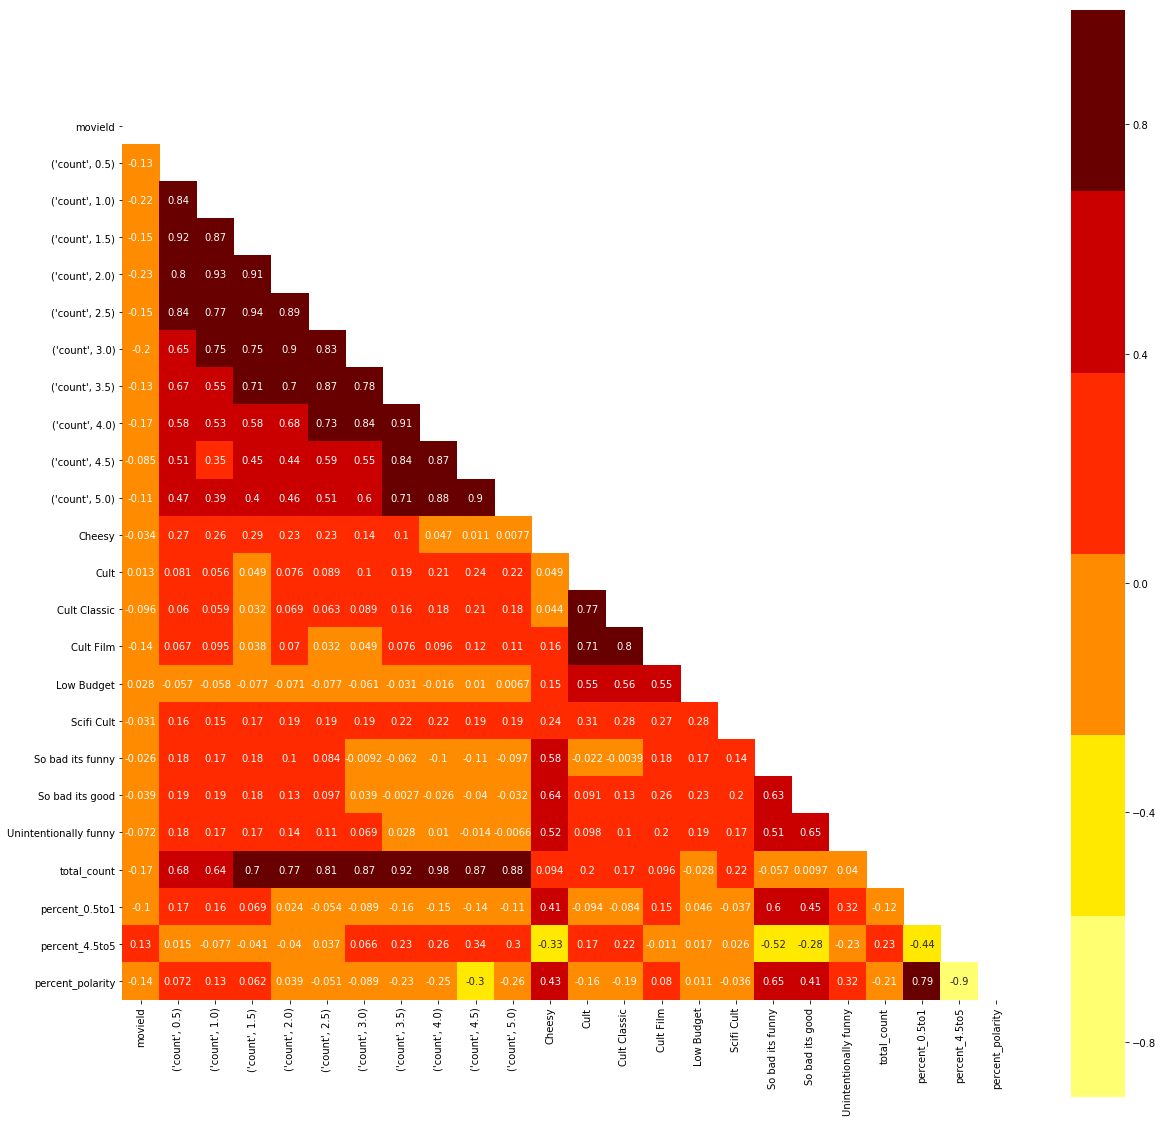

In [80]:
heatmap_corr(g_tag_test)

In [81]:
g_tag_test.genres.value_counts()

Drama                                                             1755
Comedy                                                            1165
Comedy|Drama                                                       631
Drama|Romance                                                      517
Documentary                                                        490
Comedy|Romance                                                     432
Comedy|Drama|Romance                                               349
Horror                                                             272
Drama|Thriller                                                     249
Horror|Thriller                                                    217
Crime|Drama                                                        193
Crime|Drama|Thriller                                               167
Drama|War                                                          161
Thriller                                                           122
Comedy

In [92]:
g_tag_test.describe()

movieId  (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  \
count   13176.000000  13176.000000  13176.000000  13176.000000  13176.000000   
mean    39970.868549     32.205070     66.242107     32.641014    138.490893   
std     48151.129249     78.729075    177.559421     78.772207    336.595566   
min         1.000000      0.000000      0.000000      0.000000      0.000000   
25%      3680.750000      2.000000      3.000000      2.000000      8.000000   
50%      7880.000000      6.000000     10.000000      6.000000     24.000000   
75%     71249.000000     22.000000     48.000000     24.000000    104.250000   
max    187595.000000   1132.000000   4339.000000   1219.000000   5687.000000   

       (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  \
count  13176.000000  13176.000000  13176.000000  13176.000000  13176.000000   
mean     101.587583    413.346160    253.584624    556.950213    178.522162   
std      225.521414   1113.055995    620.117198   1648.780105    662.794569   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        8.000000     22.000000     17.000000     22.000000      6.000000   
50%       21.000000     66.000000     45.000000     69.000000     18.000000   
75%       77.000000    277.250000    168.000000    307.250000     80.000000   
max     3016.000000  22333.000000   7373.000000  28340.000000  14110.000000   

       (count, 5.0)        Cheesy          Cult  Cult Classic    Cult Film  \
count  13176.000000  13176.000000  13176.000000  13176.000000  13176.00000   
mean     307.286430      0.092009      0.125118      0.246457      0.28432   
std     1426.070242      0.106802      0.133213      0.200088      0.15842   
min        0.000000      0.007250      0.006250      0.018000      0.06175   
25%        7.000000      0.030000      0.041000      0.110750      0.17925   
50%       24.000000      0.052125      0.075500      0.171750      0.23475   
75%      111.000000      0.107000      0.155750      0.306875      0.33400   
max    48762.000000      0.847000      0.968000      0.994500      0.99325   

         Low Budget    Scifi Cult  So bad its funny  So bad its good  \
count  13176.000000  13176.000000      13176.000000     13176.000000   
mean       0.127759      0.059628          0.291982         0.035529   
std        0.151946      0.075956          0.164562         0.058301   
min        0.007000      0.004750          0.051000         0.003000   
25%        0.041750      0.028500          0.169750         0.011750   
50%        0.072625      0.039000          0.239250         0.018250   
75%        0.142250      0.057500          0.372250         0.034500   
max        0.988250      1.000000          0.952500         0.897500   

       Unintentionally funny   total_count  percent_0.5to1  percent_4.5to5  \
count           13176.000000  13176.000000    13176.000000    13176.000000   
mean                0.037644   2080.856254        0.073002        0.164994   
std                 0.055112   5655.243811        0.080848        0.111613   
min                 0.005250     48.000000        0.000000        0.000000   
25%                 0.014000    118.000000        0.026316        0.076610   
50%                 0.020000    345.000000        0.046220        0.140968   
75%                 0.036500   1354.000000        0.086957        0.230769   
max                 0.806750  97999.000000        0.848739        0.746776   

       percent_polarity   total_tails  
count      13176.000000  13176.000000  
mean          -0.091992      0.237995  
std            0.164058      0.105228  
min           -0.724502      0.015152  
25%           -0.196429      0.162431  
50%           -0.091985      0.217949  
75%            0.000000      0.292553  
max            0.827731      0.913043

In [106]:
g_tag_test.loc[g_tag_test['So bad its good'] > 0.3]

movieId                                              title  \
43          44                               Mortal Kombat (1995)   
163        173                                 Judge Dredd (1995)   
183        193                                   Showgirls (1995)   
313        327                                   Tank Girl (1995)   
685        747                                Stupids, The (1996)   
942       1037                          Lawnmower Man, The (1992)   
1132      1255                                   Bad Taste (1987)   
1185      1311                          Santa with Muscles (1996)   
1350      1499                                    Anaconda (1997)   
1395      1562                              Batman & Robin (1997)   
1427      1599                                       Steel (1997)   
1498      1676                           Starship Troopers (1997)   
1503      1681                 Mortal Kombat: Annihilation (1997)   
1562      1762                                 Deep Rising (1998)   
1630      1862                                  Species II (1998)   
1649      1882                                    Godzilla (1998)   
1689      1924                     Plan 9 from Outer Space (1959)   
1734      1969  Nightmare on Elm Street 2: Freddy's Revenge, A...   
1883      2119                           Maximum Overdrive (1986)   
1926      2163              Attack of the Killer Tomatoes! (1978)   
1927      2164                         Surf Nazis Must Die (1987)   
2015      2265                         Nothing But Trouble (1991)   
2104      2362                              Glen or Glenda (1953)   
2110      2368                             King Kong Lives (1986)   
2115      2373                                   Red Sonja (1985)   
2119      2377                                   Lifeforce (1985)   
2190      2449                Garbage Pail Kids Movie, The (1987)   
2191      2450                             Howard the Duck (1986)   
2328      2602  Mighty Peking Man (a.k.a. Goliathon) (Xing xin...   
2361      2639                              Mommie Dearest (1981)   
2364      2642                                Superman III (1983)   
2418      2701                              Wild Wild West (1999)   
2598      2887                                   Simon Sez (1999)   
2995      3340                        Bride of the Monster (1955)   
3076      3437                                 Cool as Ice (1991)   
3100      3464                                Solar Crisis (1990)   
3216      3593                           Battlefield Earth (2000)   
3305      3692                      Class of Nuke 'Em High (1986)   
3306      3693                          Toxic Avenger, The (1985)   
3311      3698                            Running Man, The (1987)   
3524      3931                     Giant Gila Monster, The (1959)   
3553      3961                                    Ghoulies (1985)   
3588      3997                          Dungeons & Dragons (2000)   
3697      4120                                        Hunk (1987)   
3701      4124                           Jaws: The Revenge (1987)   
3791      4222                                    C.H.U.D. (1984)   
3838      4275                                       Krull (1983)   
4056      4514          Howling IV: The Original Nightmare (1988)   
4130      4592                                Experts, The (1989)   
4300      4775                                     Glitter (2001)   
4451      4941                                Flash Gordon (1980)   
4452      4942                       Angry Red Planet, The (1959)   
4453      4943                         At the Earth's Core (1976)   
4491      4982  Crawling Eye, The (a.k.a. Trollenberg Terror, ...   
4643      5160  Night of the Zombies (a.k.a. Hell of the Livin...   
4662      5182                             Hawk the Slayer (1980)   
4763      5305              Return of the Killer Tomatoes! (1988)   
4807 

In [170]:
g_tag_test.to_csv('first_ml_dataset.csv')

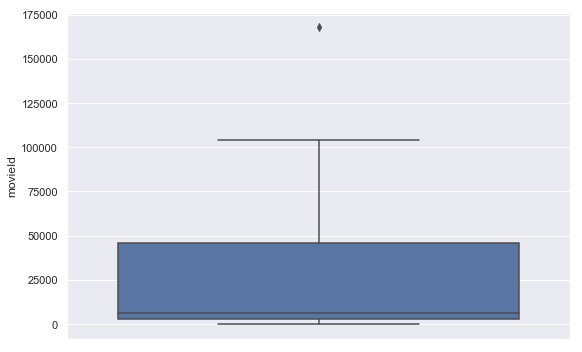

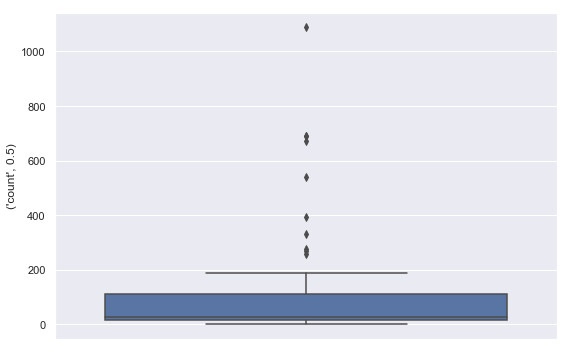

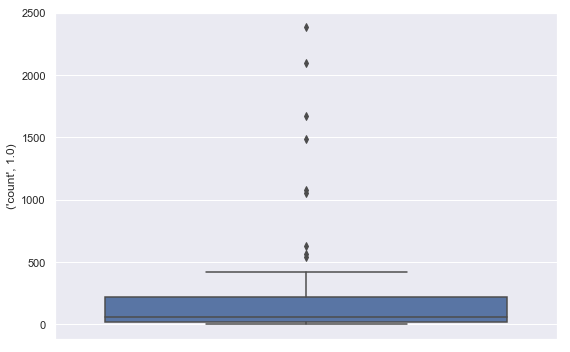

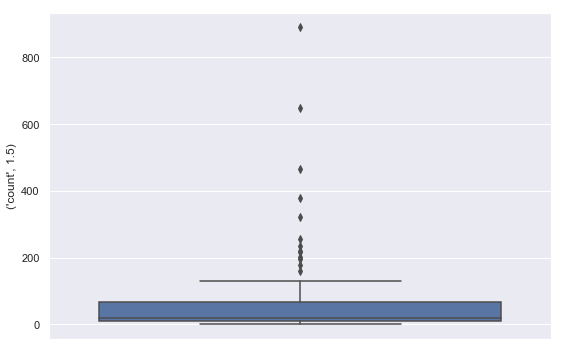

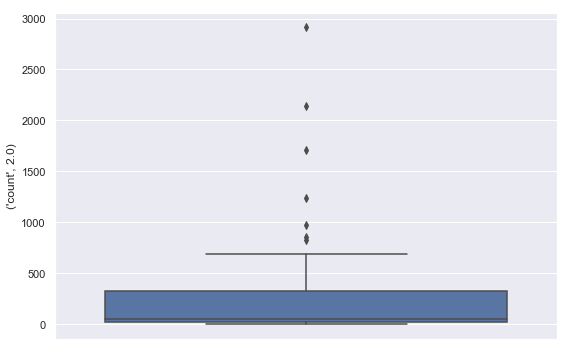

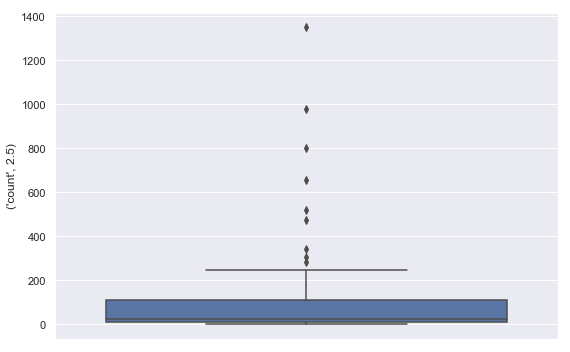

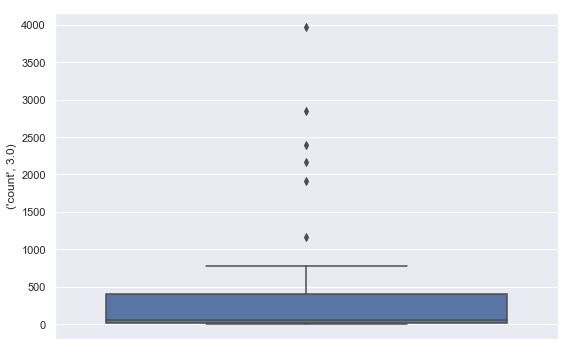

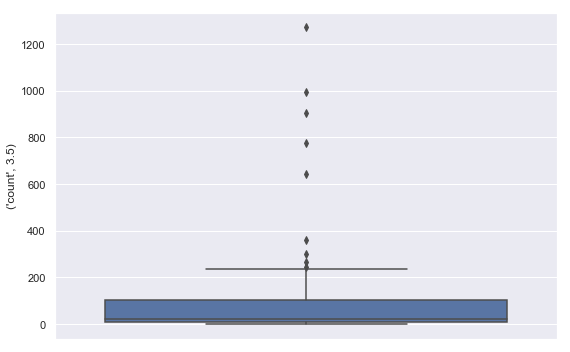

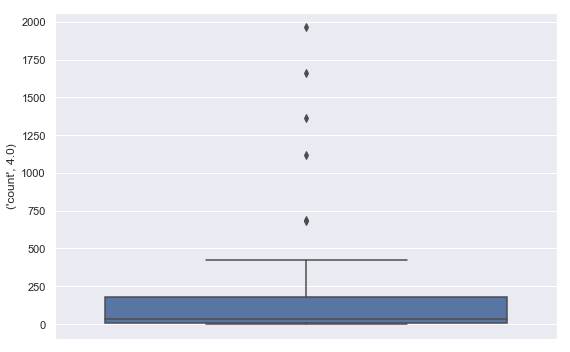

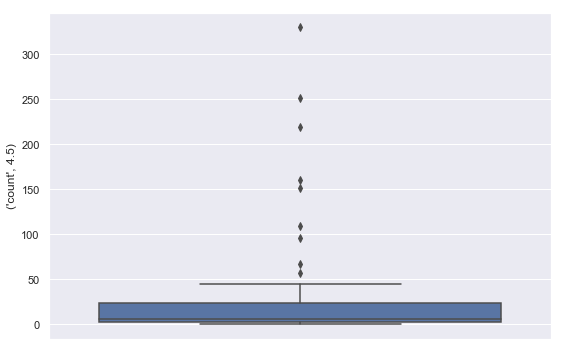

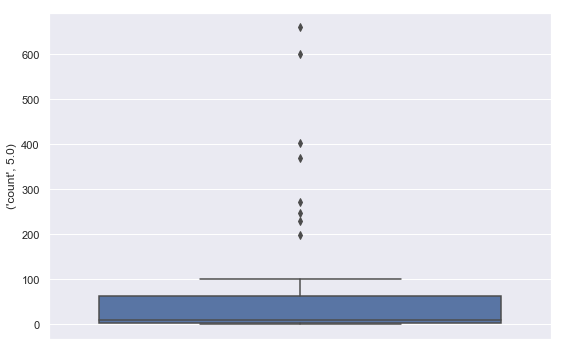

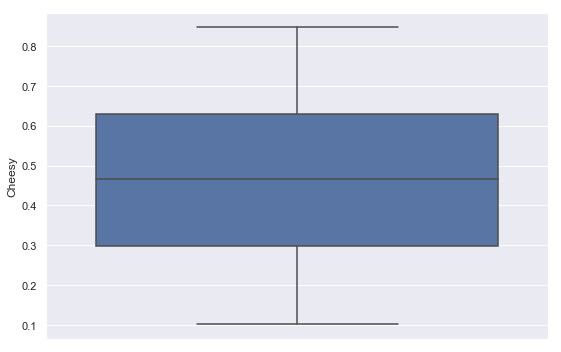

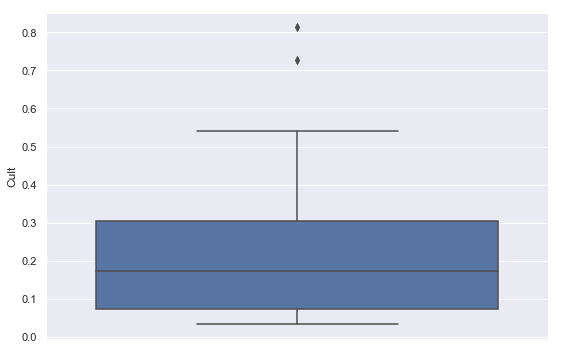

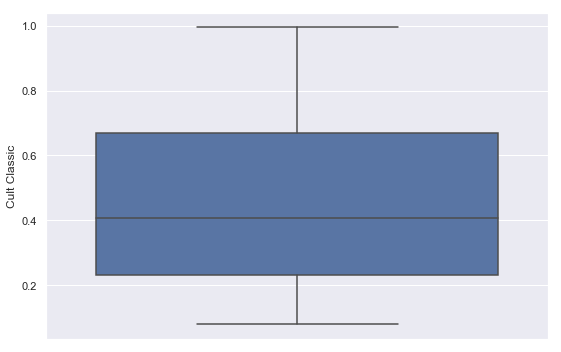

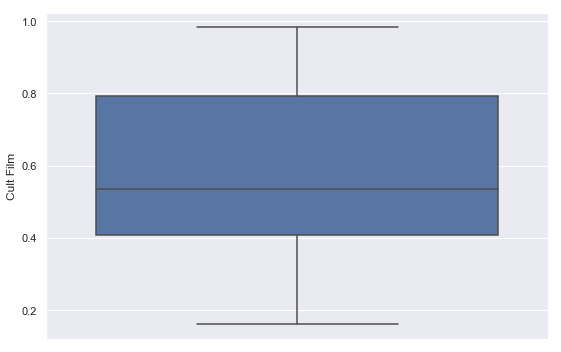

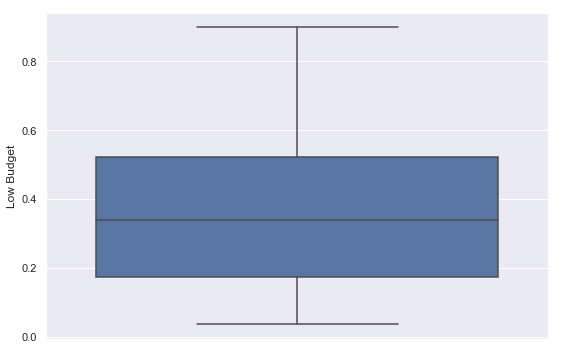

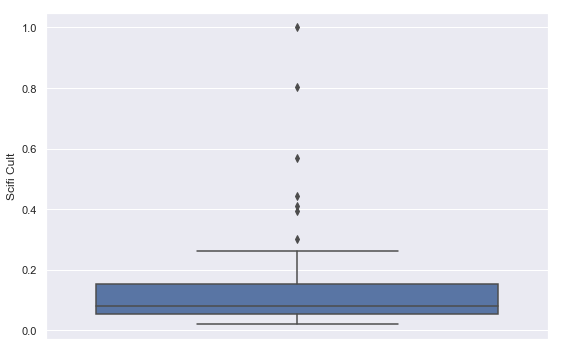

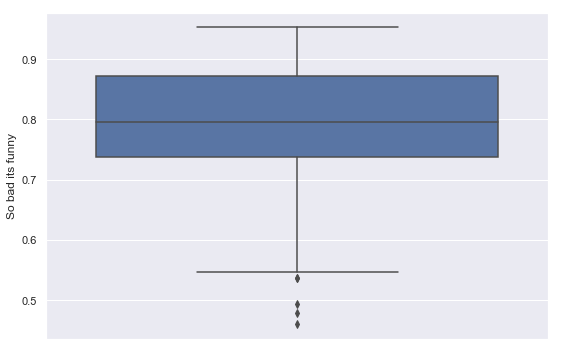

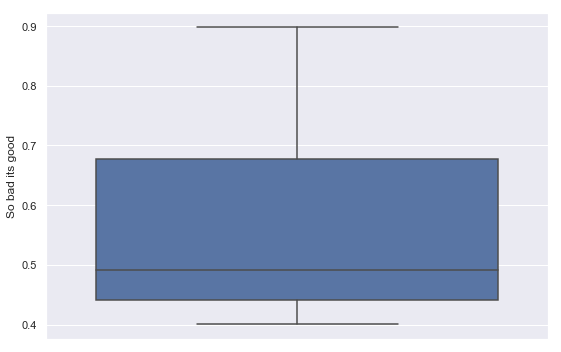

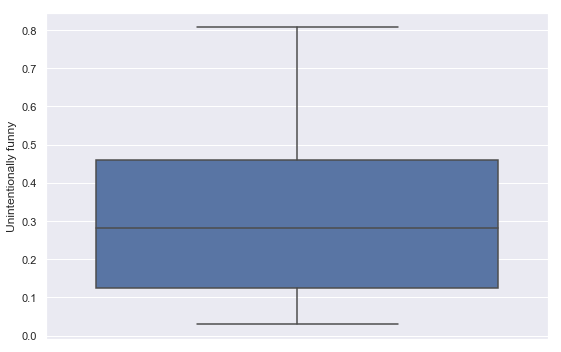

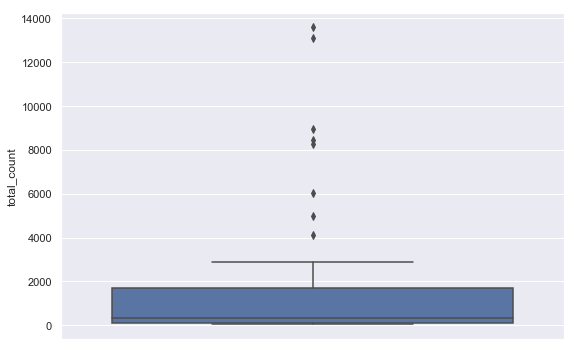

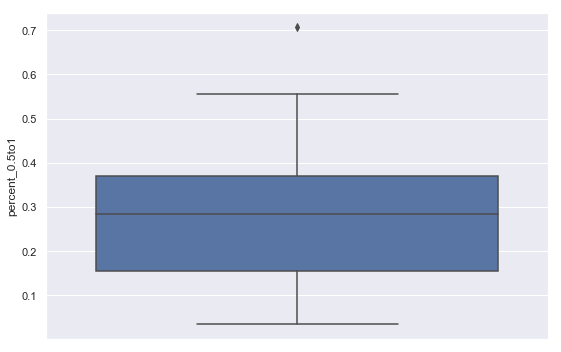

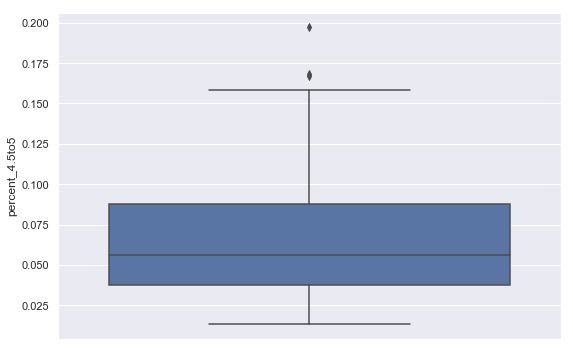

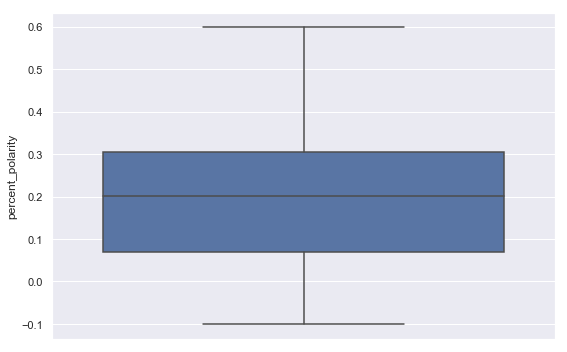

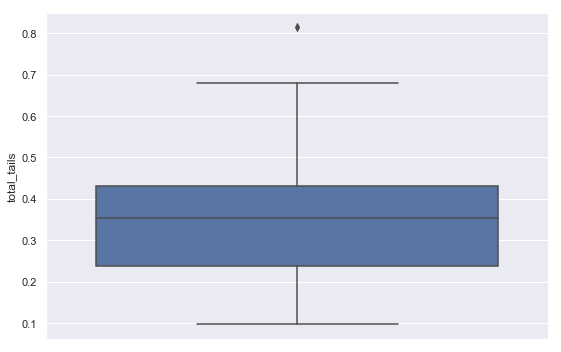

In [119]:
sns.set(rc={'figure.figsize':(9,6)})
for col in so_bad_its_good:
    ax = sns.boxplot(so_bad_its_good[col], orient='v')
    plt.show()

In [155]:
counts = []
columns = [('count', 0.5),('count', 1.0),('count', 1.5),
           ('count', 2.0),('count', 2.5),('count', 3.0),          
           ('count', 3.5),('count', 4.0),('count', 4.5),
           ('count', 5.0)]

for col in columns:
    counts.append(g_tag_test[col].sum())
counts

[424334.0,
 872806.0,
 430078.0,
 1824756.0,
 1338518.0,
 5446249.0,
 3341231.0,
 7338376.0,
 2352208.0,
 4048806.0]

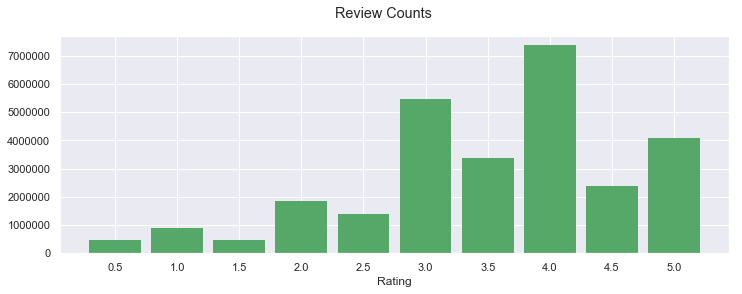

In [169]:
names = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
values = counts

plt.figure(figsize=(12, 4))

plot = plt.bar(names, values)
plt.setp(plot,color='g', linewidth=2.0)
plt.suptitle('Review Counts')
plt.xlabel('Rating')
plt.show();

In [447]:
g_tag_test.loc[g_tag_test['So bad its funny'] > 0.8]

movieId                                              title  \
685        747                                Stupids, The (1996)   
738        810                                      Kazaam (1996)   
1350      1499                                    Anaconda (1997)   
1503      1681                 Mortal Kombat: Annihilation (1997)   
1649      1882                                    Godzilla (1998)   
1689      1924                     Plan 9 from Outer Space (1959)   
1926      2163              Attack of the Killer Tomatoes! (1978)   
1927      2164                         Surf Nazis Must Die (1987)   
2104      2362                              Glen or Glenda (1953)   
2110      2368                             King Kong Lives (1986)   
2191      2450                             Howard the Duck (1986)   
2271      2534                                   Avalanche (1978)   
2273      2536                  Concorde: Airport '79, The (1979)   
2290      2555                               Baby Geniuses (1999)   
2328      2602  Mighty Peking Man (a.k.a. Goliathon) (Xing xin...   
2377      2656                                   Tarantula (1955)   
2464      2748  Allan Quatermain and the Lost City of Gold (1987)   
2678      2974                                        Bats (1999)   
2995      3340                        Bride of the Monster (1955)   
2999      3344                                 Blood Feast (1963)   
3076      3437                                 Cool as Ice (1991)   
3122      3488                      Hideous Sun Demon, The (1959)   
3198      3572                                   Carnosaur (1993)   
3199      3573                                 Carnosaur 2 (1995)   
3216      3593                           Battlefield Earth (2000)   
3524      3931                     Giant Gila Monster, The (1959)   
3526      3933                          Killer Shrews, The (1959)   
3534      3942                  Sorority House Massacre II (1990)   
3700      4123                                      Ishtar (1987)   
3736      4162                                See Spot Run (2001)   
3961      4412                   Thing with Two Heads, The (1972)   
3973      4425                 Howling III: The Marsupials (1987)   
4056      4514          Howling IV: The Original Nightmare (1988)   
4135      4598                             Going Overboard (1989)   
4166      4630                             No Holds Barred (1989)   
4300      4775                                     Glitter (2001)   
4306      4781                   Megiddo: The Omega Code 2 (2001)   
4491      4982  Crawling Eye, The (a.k.a. Trollenberg Terror, ...   
4496      4987  Spacehunter: Adventures in the Forbidden Zone ...   
4547      5045                                    Galaxina (1980)   
4620      5126                          Deadly Mantis, The (1957)   
4643      5160  Night of the Zombies (a.k.a. Hell of the Livin...   
4739      5278                         Fraternity Vacation (1985)   
4807      5356                  Giant Spider Invasion, The (1975)   
4969      5543                                  Swarm, The (1978)   
4978      5556  FearDotCom (a.k.a. Fear.com) (a.k.a. Fear Dot ...   
5095      5701                              Up the Academy (1980)   
5128      5746                    Galaxy of Terror (Quest) (1981)   
5151      5779                    Piranha II: The Spawning (1981)   
5180      5815                              Half Past Dead (2002)   
5305      5979                 Attack of the Crab Monsters (1957)   
5430      6152             Yor, the Hunter from the Future (1983)   
5475      6208                  Teenagers from Outer Space (1959)   
5524      6264                                   Core, The (2003)   
5693      6483                        From Justin to Kelly (2003)   
5761      6574                          Eve of Destruction (1991)   
5773      6587                                       Gigli (2003)   
5883 

### Setting up dataframe for clustering. 

In [173]:
cluster_df = g_tag_test.drop(['title', 'genres','imdbId','tmdbId'],axis=1)
cluster_df.set_index('movieId', inplace=True)
cluster_df.head()

(count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
movieId                                                                         
1               478.0         840.0         468.0        2160.0        1665.0   
2               276.0         813.0         542.0        2551.0        1902.0   
3               174.0         777.0         237.0        1677.0         629.0   
4                48.0         352.0          31.0         497.0          77.0   
5               248.0         802.0         282.0        1737.0         681.0   

         (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
movieId                                                                         
1             11872.0        6095.0       22710.0        5684.0       16497.0   
2              8711.0        3116.0        6303.0         790.0        2139.0   
3              6227.0         774.0        3440.0         159.0        1491.0   
4              1136.0          68.0         557.0          12.0         211.0   
5              6655.0         761.0        2989.0         174.0        1145.0   

          Cheesy     Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
movieId                                                                      
1        0.07500  0.21400       0.30725    0.21925     0.07300     0.11750   
2        0.19625  0.11075       0.11025    0.19675     0.04200     0.04500   
3        0.06900  0.04100       0.10225    0.17550     0.02775     0.04600   
4        0.07775  0.04275       0.10675    0.21600     0.05475     0.02800   
5        0.08750  0.02750       0.08375    0.17825     0.02875     0.02925   

         So bad its funny  So bad its good  Unintentionally funny  \
movieId                                                             
1                 0.13650          0.01150                0.01875   
2                 0.28000          0.02125                0.04200   
3                 0.22900          0.03375                0.03425   
4                 0.28075          0.01600                0.03725   
5                 0.24200          0.01750                0.03850   

         total_count  percent_0.5to1  percent_4.5to5  percent_polarity  \
movieId                                                                  
1            68469.0        0.019250        0.323957         -0.304707   
2            27143.0        0.040121        0.107910         -0.067789   
3            15585.0        0.061020        0.105871         -0.044851   
4             2989.0        0.133824        0.074607          0.059217   
5            15474.0        0.067856        0.085240         -0.017384   

         total_tails  
movieId               
1           0.343206  
2           0.148031  
3           0.166891  
4           0.208431  
5           0.153096

In [232]:
cluster_df.drop('total_count',inplace=True,axis=1)

In [241]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13176 entries, 1 to 187595
Data columns (total 23 columns):
(count, 0.5)             13176 non-null float64
(count, 1.0)             13176 non-null float64
(count, 1.5)             13176 non-null float64
(count, 2.0)             13176 non-null float64
(count, 2.5)             13176 non-null float64
(count, 3.0)             13176 non-null float64
(count, 3.5)             13176 non-null float64
(count, 4.0)             13176 non-null float64
(count, 4.5)             13176 non-null float64
(count, 5.0)             13176 non-null float64
Cheesy                   13176 non-null float64
Cult                     13176 non-null float64
Cult Classic             13176 non-null float64
Cult Film                13176 non-null float64
Low Budget               13176 non-null float64
Scifi Cult               13176 non-null float64
So bad its funny         13176 non-null float64
So bad its good          13176 non-null float64
Unintentionally funny    1

### Clustering EDA.

In [226]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [271]:
import pprint
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

In [233]:
cluster_df.shape

(13176, 23)

In [234]:
Z = linkage(cluster_df, 'ward')

In [235]:
c, coph_dists = cophenet(Z, pdist(cluster_df))
c

0.7695650110240437

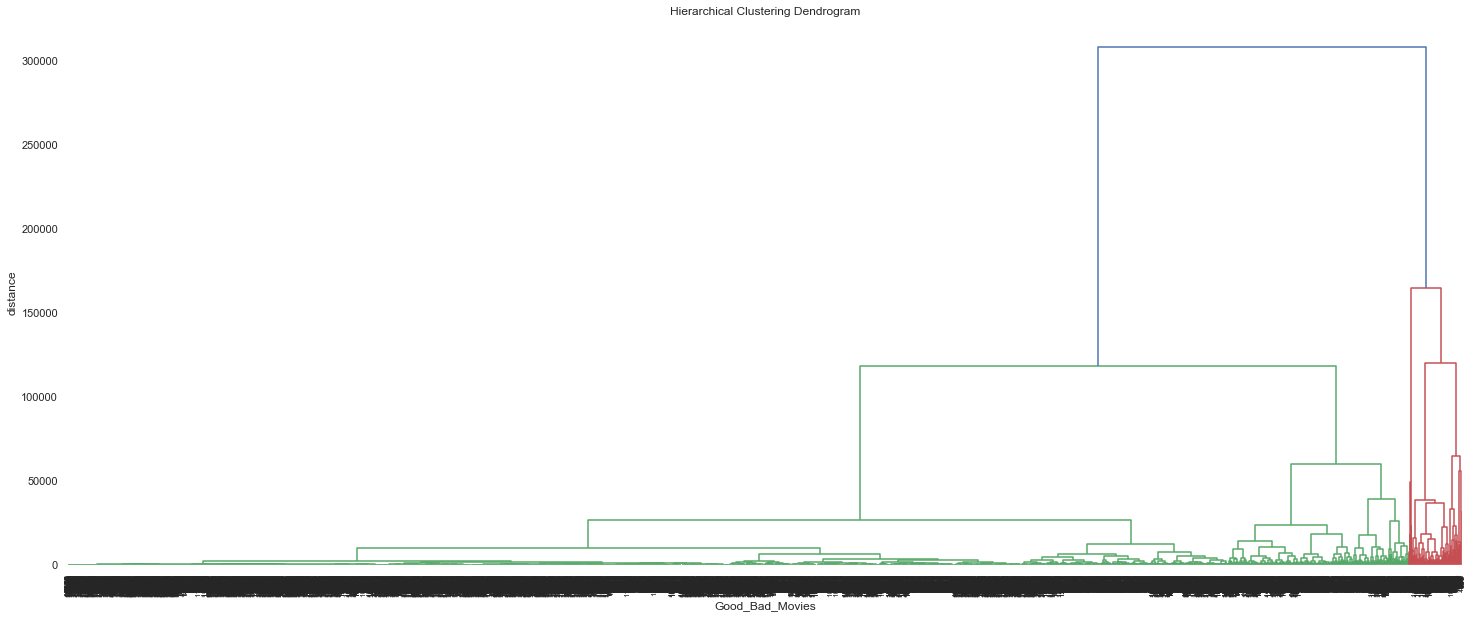

In [236]:
# calculate and construct the dendrogram 
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Good_Bad_Movies')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [269]:
Z[-12:,2]

array([ 33169.18751606,  36780.95858719,  38261.19844806,  39148.81566618,
        48985.23190319,  55519.08768835,  60060.49786496,  64799.25671197,
       118495.20065233, 120258.07689223, 164875.6338503 , 308008.33801865])

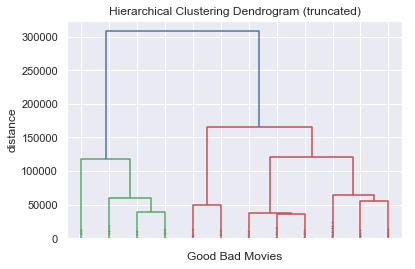

In [264]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Good Bad Movies')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [230]:
Z_average = linkage(cluster_df, 'average')
c_average, coph_dists_average = cophenet(Z_average, pdist(cluster_df))
c_average

0.9480121604754433

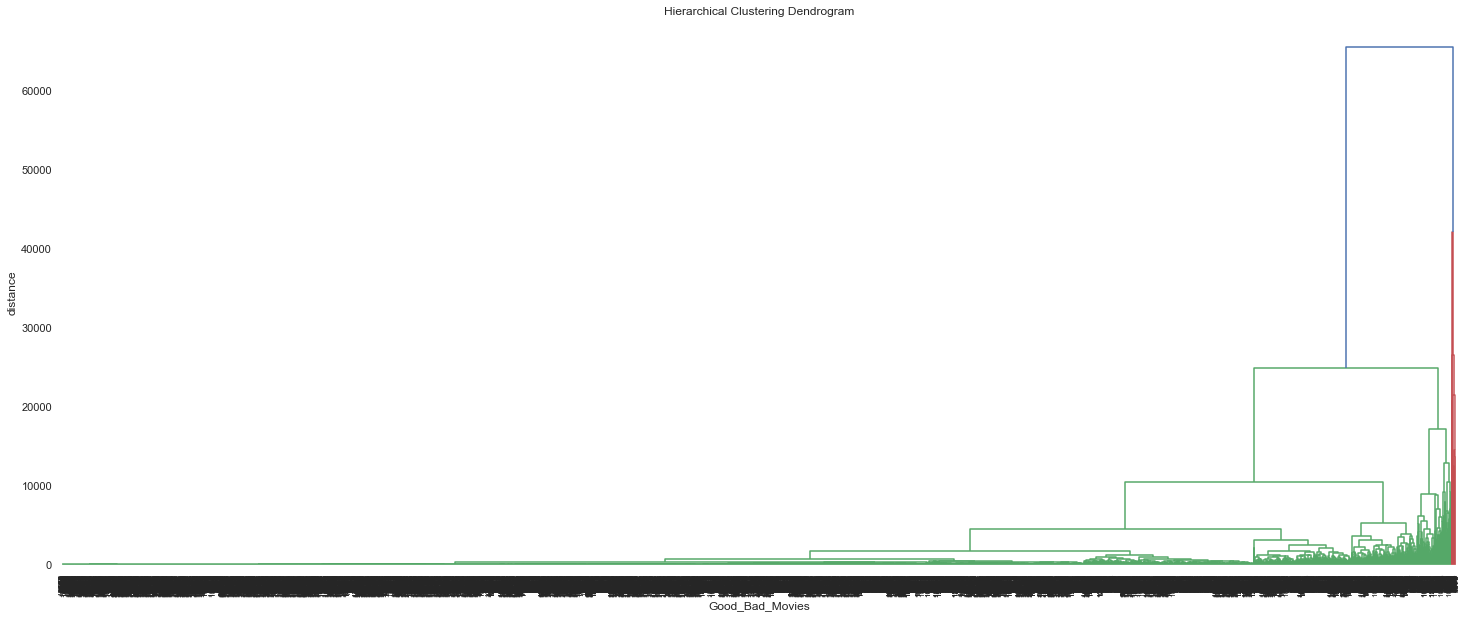

In [231]:
# calculate and construct the dendrogram 
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Good_Bad_Movies')
plt.ylabel('distance')
dendrogram(
    Z_average,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [268]:
Z_average[-12:,2]

array([12551.37045603, 12885.7298612 , 12940.08188335, 13678.31598158,
       14565.22838073, 17227.80160446, 20730.10175309, 21531.74332772,
       24936.19448306, 26556.43548839, 42172.84736609, 65548.11436597])

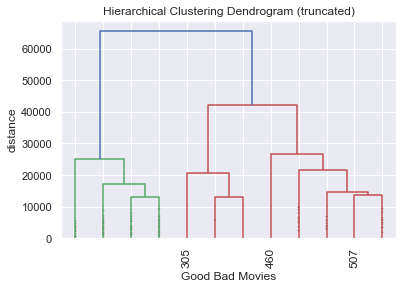

In [265]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Good Bad Movies')
plt.ylabel('distance')
dendrogram(
    Z_average,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [258]:
Z_complete = linkage(cluster_df, 'complete')
c_complete, coph_dists_complete = cophenet(Z_complete, pdist(cluster_df))
c_complete

0.9459263221667707

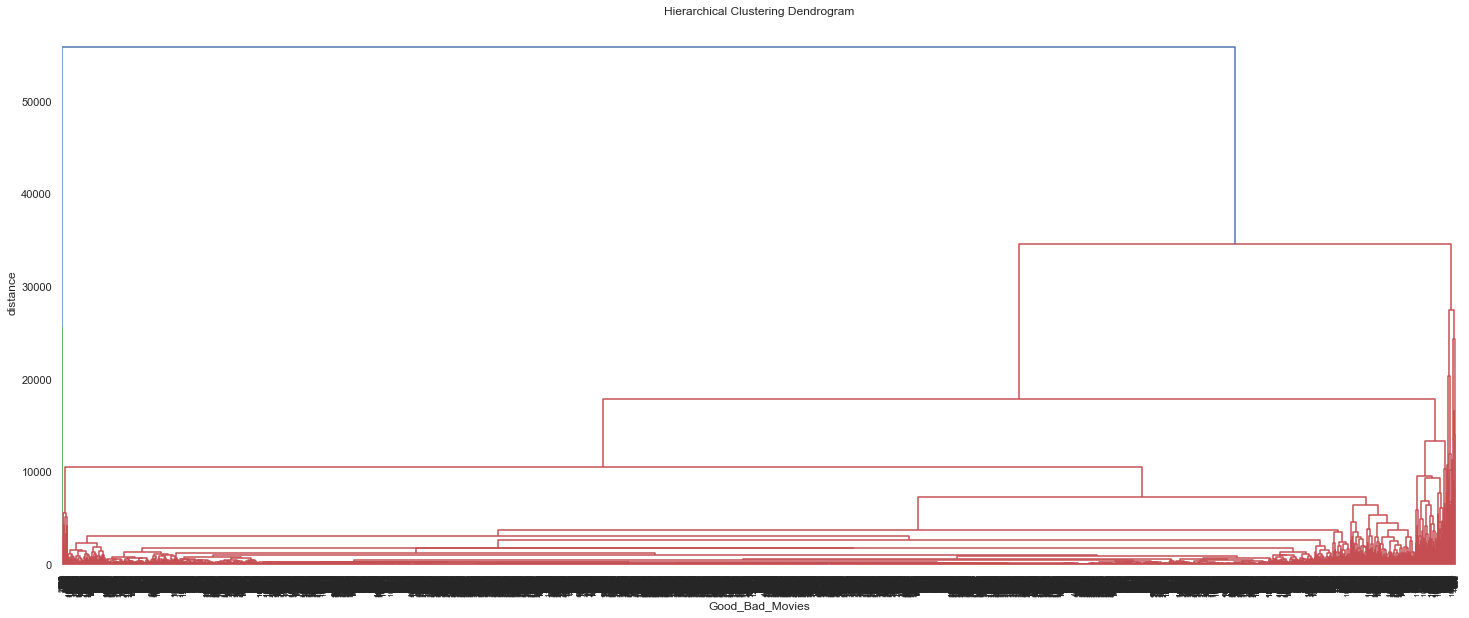

In [260]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Good_Bad_Movies')
plt.ylabel('distance')
dendrogram(
    Z_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [267]:
Z_complete[-12:,2]

array([11989.99162813, 13313.77532106, 14014.0808931 , 16586.55290292,
       17545.27190402, 17950.65813715, 20358.34473119, 24337.59186117,
       25663.75922588, 27473.52946975, 34580.56608414, 55888.93160625])

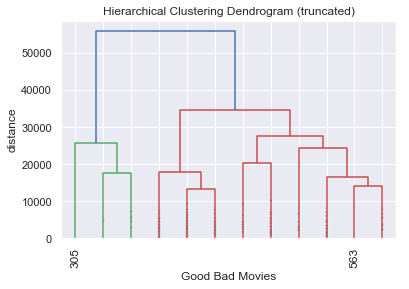

In [266]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Good Bad Movies')
plt.ylabel('distance')
dendrogram(
    Z_complete,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

## Clustering proper attempts.

In [274]:
# Scaling to help minimize outliers for clustering. But is this necessary?
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cluster_df)
features_scaled = pd.DataFrame(data_scaled, columns=cluster_df.columns)

In [276]:
features_scaled.describe()

(count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
count  1.317600e+04  1.317600e+04  1.317600e+04  1.317600e+04  1.317600e+04   
mean   1.646089e-15  2.244625e-15  6.768539e-15 -1.803586e-15  9.799850e-16   
std    1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00   
min   -4.090775e-01 -3.730842e-01 -4.143879e-01 -4.114616e-01 -4.504736e-01   
25%   -3.836729e-01 -3.561878e-01 -3.889973e-01 -3.876933e-01 -4.149989e-01   
50%   -3.328639e-01 -3.167629e-01 -3.382161e-01 -3.401567e-01 -3.573525e-01   
75%   -1.296275e-01 -1.027419e-01 -1.097004e-01 -1.017310e-01 -1.090296e-01   
max    1.396989e+01  2.406473e+01  1.506120e+01  1.648483e+01  1.292349e+01   

       (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
count  1.317600e+04  1.317600e+04  1.317600e+04  1.317600e+04  1.317600e+04   
mean  -6.582049e-17 -7.693746e-16 -7.813397e-16 -7.896246e-16  1.652851e-15   
std    1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00   
min   -3.713756e-01 -4.089457e-01 -3.378081e-01 -2.693579e-01 -2.154859e-01   
25%   -3.516095e-01 -3.815305e-01 -3.244644e-01 -2.603050e-01 -2.105772e-01   
50%   -3.120771e-01 -3.363760e-01 -2.959574e-01 -2.421991e-01 -1.986558e-01   
75%   -1.222772e-01 -1.380189e-01 -1.514512e-01 -1.486522e-01 -1.376467e-01   
max    1.969396e+01  1.148119e+01  1.685131e+01  2.102010e+01  3.397908e+01   

             Cheesy          Cult  Cult Classic     Cult Film    Low Budget  \
count  1.317600e+04  1.317600e+04  1.317600e+04  1.317600e+04  1.317600e+04   
mean   2.250190e-17 -1.249928e-16  8.545751e-17 -3.136110e-16  1.064638e-16   
std    1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00   
min   -7.936376e-01 -8.923521e-01 -1.141823e+00 -1.404995e+00 -7.947799e-01   
25%   -5.806192e-01 -6.314815e-01 -6.782604e-01 -6.632659e-01 -5.660708e-01   
50%   -3.734530e-01 -3.724877e-01 -3.733835e-01 -3.129174e-01 -3.628653e-01   
75%    1.403660e-01  2.299545e-01  3.019687e-01  3.136068e-01  9.537563e-02   
max    7.069315e+00  6.327570e+00  3.738705e+00  4.475179e+00  5.663372e+00   

         Scifi Cult  So bad its funny  So bad its good  Unintentionally funny  \
count  1.317600e+04      1.317600e+04     1.317600e+04           1.317600e+04   
mean  -1.129435e-16      1.679322e-17    -7.208950e-16           1.599695e-16   
std    1.000038e+00      1.000038e+00     1.000038e+00           1.000038e+00   
min   -7.225238e-01     -1.464437e+00    -5.579663e-01          -5.878073e-01   
25%   -4.098294e-01     -7.427981e-01    -4.078775e-01          -4.290337e-01   
50%   -2.715856e-01     -3.204496e-01    -2.963830e-01          -3.201604e-01   
75%   -2.801314e-02      4.877857e-01    -1.764672e-02          -2.075873e-02   
max    1.238102e+01      4.013940e+00     1.478539e+01           1.395585e+01   

       percent_0.5to1  percent_4.5to5  percent_polarity   total_tails  
count    1.317600e+04    1.317600e+04      1.317600e+04  1.317600e+04  
mean     6.882860e-16    3.502540e-16      1.814392e-16 -6.151053e-18  
std      1.000038e+00    1.000038e+00      1.000038e+00  1.000038e+00  
min     -9.029800e-01   -1.478319e+00     -3.855558e+00 -2.117801e+00  
25%     -5.774713e-01   -7.919088e-01     -6.366086e-01 -7.181231e-01  
50%     -3.312730e-01   -2.152647e-01      4.531302e-05 -1.905113e-01  
75%      1.726140e-01    5.893406e-01      5.607514e-01  5.184947e-01  
max      9.595360e+00    5.212689e+00      5.606311e+00  6.415343e+00

In [456]:
def agg_cluster(df,linkage='ward',distance='euclidean'):
    Z = shc.linkage(cluster_df,linkage,distance)
    
    c, coph_dists = cophenet(Z, pdist(cluster_df))
    print('Cophenet Correlation:',c)
    
    plt.title('Hierarchical Clustering Dendrogram (truncated)')
    plt.xlabel('No. of clusters')
    plt.ylabel('distance')
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=12,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.show()
    
    #Shows the distance of the 12 final splits.
    print('Last 12 cluster distances:',Z[-12:,2])
    

In [391]:
def agg_clust(df,n,affinity,linkage):
    agg_clust = AgglomerativeClustering(n_clusters=n,affinity=affinity,linkage=linkage)
    assigned_clust = agg_clust.fit_predict(df)
    return agg_clust,assigned_clust
    
    
    

### 1. Ward's

Cophenet Correlation: 0.7695650110240437


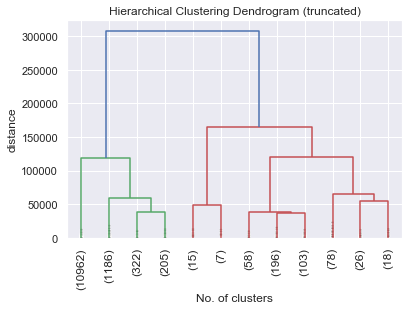

Last 12 cluster distances: [ 33169.18751606  36780.95858719  38261.19844806  39148.81566618
  48985.23190319  55519.08768835  60060.49786496  64799.25671197
 118495.20065233 120258.07689223 164875.6338503  308008.33801865]


In [295]:
agg_cluster(features_scaled)

In [322]:
ward_pred = agg_clust(features_scaled,n=2,affinity='euclidean',linkage='ward')
ward_pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
agg_cluster(features_scaled)
ward_pred = agg_clust(features_scaled,n=2,affinity='euclidean',linkage='ward')
ward_pred

### 2. Average

Cophenet Correlation: 0.9620457222735435


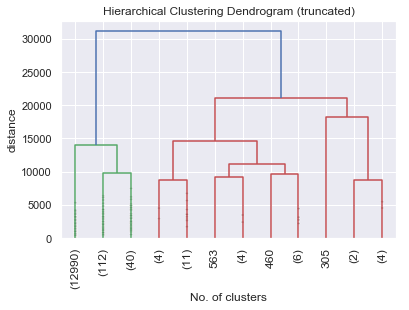

Last 12 cluster distances: [ 8502.40267608  8760.08482414  8815.72202502  9164.89811311
  9592.67216557  9829.72247253 11204.14571864 14033.94441078
 14622.12776189 18214.21450352 21026.08578506 31185.37664853]


In [296]:
agg_cluster(features_scaled,'average')

In [321]:
average_pred = agg_clust(features_scaled,n=2,affinity='euclidean',linkage='average')
average_pred

array([1, 1, 1, ..., 0, 0, 0])

Cophenet Correlation: 0.9384070595122184


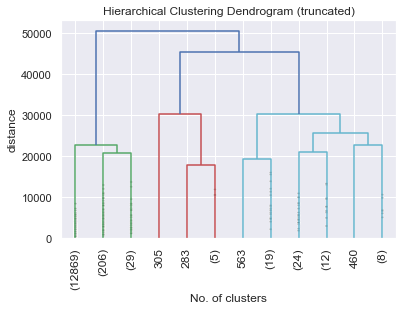

Last 12 cluster distances: [17557.9769074  17764.42489518 19232.89313892 20667.79490028
 21068.51741748 22706.54491954 22775.82447215 25620.77866086
 30231.17212061 30402.63170988 45556.45893426 50630.11646518]


In [299]:
agg_cluster(features_scaled,'average','cityblock')

In [329]:
avg_man_pred = agg_clust(features_scaled,n=3,affinity='cityblock',linkage='average')
avg_man_pred

array([0, 0, 0, ..., 0, 0, 0])

Cophenet Correlation: -0.011213878461603792


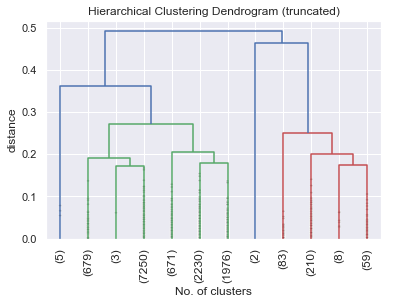

Last 12 cluster distances: [0.16910286 0.17281109 0.1756089  0.17960336 0.19210688 0.20179791
 0.20620556 0.24996752 0.27227912 0.36262232 0.46318364 0.49149718]


In [301]:
agg_cluster(features_scaled,'average','cosine')

### 3. Complete

Cophenet Correlation: 0.9459263221667707


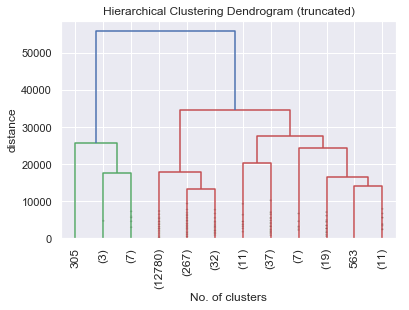

Last 12 cluster distances: [11989.99162813 13313.77532106 14014.0808931  16586.55290292
 17545.27190402 17950.65813715 20358.34473119 24337.59186117
 25663.75922588 27473.52946975 34580.56608414 55888.93160625]


In [297]:
agg_cluster(features_scaled,'complete')

In [331]:
comp_pred = agg_clust(features_scaled,n=2,affinity='euclidean',linkage='complete')
comp_pred

array([0, 0, 0, ..., 0, 0, 0])

Cophenet Correlation: 0.9084274356802059


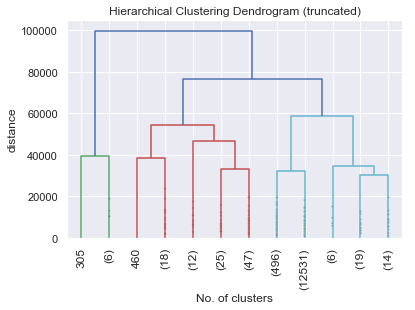

Last 12 cluster distances: [28520.04747229 30183.77936897 31983.21518964 33037.00082976
 34456.46828645 38711.71048895 39442.17770348 46746.64180981
 54409.40331853 58904.09360846 76405.82663467 99709.1994171 ]


In [302]:
agg_cluster(features_scaled,'complete','cityblock')

In [332]:
comp_man_pred = agg_clust(features_scaled,n=3,affinity='cityblock',linkage='complete')
comp_man_pred

array([0, 0, 1, ..., 1, 1, 1])

In [337]:
type(comp_man_pred)

numpy.ndarray

Cophenet Correlation: 0.023818950795602634


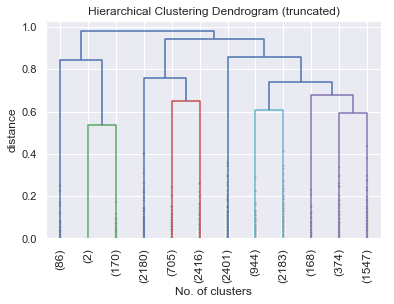

Last 12 cluster distances: [0.52453407 0.53563976 0.59516855 0.60560848 0.65043567 0.6780293
 0.74156436 0.75983879 0.84293864 0.85968207 0.94513235 0.97907015]


In [303]:
agg_cluster(features_scaled,'complete','cosine')

## Checking the clusters.

In [340]:
df_ward = g_tag_test.copy()
df_ward['Cluster'] = ward_pred
df_ward.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [436]:
df_ward.loc[df_ward.Cluster == 1]

movieId                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
4            5                 Father of the Bride Part II (1995)   
5            6                                        Heat (1995)   
6            7                                     Sabrina (1995)   
9           10                                   GoldenEye (1995)   
10          11                     American President, The (1995)   
15          16                                      Casino (1995)   
16          17                       Sense and Sensibility (1995)   
18          19              Ace Ventura: When Nature Calls (1995)   
20          21                                  Get Shorty (1995)   
21          22                                     Copycat (1995)   
23          24                                      Powder (1995)   
24          25                           Leaving Las Vegas (1995)   
28          29  City of Lost Children, The (Cité des enfants p...   
30          31                             Dangerous Minds (1995)   
31          32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
33          34                                        Babe (1995)   
35          36                            Dead Man Walking (1995)   
38          39                                    Clueless (1995)   
43          44                               Mortal Kombat (1995)   
44          45                                  To Die For (1995)   
46          47                        Seven (a.k.a. Se7en) (1995)   
47          48                                  Pocahontas (1995)   
49          50                         Usual Suspects, The (1995)   
56          58                  Postman, The (Postino, Il) (1994)   
58          60                 Indian in the Cupboard, The (1995)   
60          62                          Mr. Holland's Opus (1995)   
63          65                                    Bio-Dome (1996)   
64          66          Lawnmower Man 2: Beyond Cyberspace (1996)   
68          70                         From Dusk Till Dawn (1996)   
92          95                                Broken Arrow (1996)   
101        104                               Happy Gilmore (1996)   
102        105              Bridges of Madison County, The (1995)   
104        107                      Muppet Treasure Island (1996)   
106        110                                  Braveheart (1995)   
107        111                                 Taxi Driver (1976)   
108        112         Rumble in the Bronx (Hont faan kui) (1995)   
128        135                              Down Periscope (1996)   
133        141                               Birdcage, The (1996)   
135        145                                    Bad Boys (1995)   
140        150                                   Apollo 13 (1995)   
141        151                                     Rob Roy (1995)   
143        153                              Batman Forever (1995)   
148        158                                      Casper (1995)   
150        160                                       Congo (1995)   
151        161                                Crimson Tide (1995)   
152        162                                       Crumb (1994)   
153        163                                   Desperado (1995)   
155        165                  Die Hard: With a Vengeance (1995)   
158        168                                First Knight (1995)   
160        170                                     Hackers (1995)   
162        172                             Johnny Mnemonic (1995)   
163        173                                 Judge Dredd (1995)   
170        180                                    Mallrats (1995)   
171        181     Mighty Morphin Power Rangers: The Movie (1995)   
175  

In [341]:
df_avg = g_tag_test.copy()
df_avg['Cluster'] = average_pred
df_avg.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [353]:
df_avg.loc[df_avg.imdbId == 'tt0368226']

movieId             title                genres     imdbId tmdbId  \
10113    74754  Room, The (2003)  Comedy|Drama|Romance  tt0368226  17473   

       (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
10113         151.0          81.0          29.0          41.0          22.0   

       (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
10113          53.0          45.0          55.0          24.0          93.0   

        Cheesy    Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
10113  0.13125  0.2365         0.622     0.8735      0.4445      0.0655   

       So bad its funny  So bad its good  Unintentionally funny  total_count  \
10113            0.8505           0.8165                  0.781        594.0   

       percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  Cluster  
10113        0.390572         0.19697          0.193603     0.587542        0

In [366]:
df_avg.loc[df_avg.Cluster == 1].describe()

movieId  (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  \
count    1172.000000   1172.000000   1172.000000   1172.000000   1172.000000   
mean    15209.940273    195.590444    404.937713    202.606655    882.906997   
std     29657.352305    170.952761    423.689960    167.895391    725.088866   
min         1.000000     11.000000     21.000000      8.000000     77.000000   
25%      1207.750000     83.000000    145.000000     88.000000    370.000000   
50%      2443.000000    141.000000    274.000000    155.000000    704.000000   
75%      6233.750000    252.000000    505.000000    257.000000   1150.500000   
max    176371.000000   1132.000000   4339.000000   1219.000000   5687.000000   

       (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  \
count   1172.000000   1172.000000   1172.000000   1172.000000   1172.000000   
mean     634.950512   2878.521331   1749.636519   4250.208191   1418.738908   
std      430.158251   2519.403453   1236.916767   3787.173373   1763.579307   
min       43.000000    148.000000     26.000000     78.000000      2.000000   
25%      337.750000   1371.500000    916.750000   1997.500000    410.000000   
50%      520.500000   2137.000000   1407.500000   3083.500000    837.500000   
75%      826.250000   3442.500000   2220.000000   5095.750000   1604.250000   
max     3016.000000  22333.000000   7373.000000  28340.000000  14110.000000   

       (count, 5.0)       Cheesy         Cult  Cult Classic    Cult Film  \
count   1172.000000  1172.000000  1172.000000   1172.000000  1172.000000   
mean    2597.104096     0.127912     0.189911      0.349599     0.335057   
std     4089.369454     0.128217     0.165787      0.253549     0.189599   
min       31.000000     0.010750     0.020500      0.049500     0.086250   
25%      704.000000     0.043250     0.071438      0.136687     0.188438   
50%     1321.500000     0.082000     0.128750      0.247750     0.265750   
75%     2827.500000     0.163312     0.257750      0.533937     0.442625   
max    48762.000000     0.823750     0.916500      0.994500     0.993250   

        Low Budget   Scifi Cult  So bad its funny  So bad its good  \
count  1172.000000  1172.000000       1172.000000      1172.000000   
mean      0.112450     0.093526          0.270519         0.041866   
std       0.120005     0.123140          0.143249         0.062203   
min       0.012750     0.014750          0.090250         0.006000   
25%       0.042750     0.035250          0.170187         0.014500   
50%       0.072250     0.050500          0.225250         0.021250   
75%       0.136250     0.081875          0.318000         0.041250   
max       0.947250     1.000000          0.904250         0.700750   

       Unintentionally funny   total_count  percent_0.5to1  percent_4.5to5  \
count            1172.000000   1172.000000     1172.000000     1172.000000   
mean                0.048399  15215.201365        0.051854        0.224792   
std                 0.068387  12433.538250        0.062377        0.123074   
min                 0.006750   1498.000000        0.005066        0.017557   
25%                 0.016438   7700.750000        0.020212        0.120763   
50%                 0.025000  11203.500000        0.031923        0.216587   
75%                 0.049562  17735.750000        0.054620        0.303790   
max                 0.774750  97999.000000        0.556093        0.641558   

       percent_polarity  total_tails  Cluster  
count       1172.000000  1172.000000   1172.0  
mean          -0.172939     0.276646      1.0  
std            0.166646     0.101516      0.0  
min           -0.633292     0.104325      1.0  
25%           -0.280772     0.194613      1.0  
50%           -0.186901     0.261195      1.0  
75%           -0.072834     0.339162      1.0  
max            0.537764     0.649823      1.0

In [367]:
df_avg.loc[df_avg.Cluster == 0].describe()

movieId  (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  \
count   12004.000000  12004.000000  12004.000000  12004.000000  12004.000000   
mean    42388.380040     16.253082     33.173859     16.046568     65.810480   
std     48922.381411     33.034970     69.267808     31.060295    116.941255   
min         4.000000      0.000000      0.000000      0.000000      0.000000   
25%      4223.500000      2.000000      3.000000      2.000000      7.000000   
50%      8691.000000      5.000000      8.000000      5.000000     19.000000   
75%     74486.500000     15.000000     30.000000     15.000000     67.000000   
max    187595.000000    457.000000   1081.000000    380.000000   1528.000000   

       (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  \
count  12004.000000  12004.000000  12004.000000  12004.000000  12004.000000   
mean      49.513162    172.660946    107.518910    196.362213     57.434688   
std       85.353413    298.834647    181.533931    350.381267    117.944652   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.000000     21.000000     16.000000     20.000000      5.000000   
50%       17.500000     53.000000     38.000000     57.000000     15.000000   
75%       52.000000    179.000000    111.000000    193.000000     51.000000   
max     1021.000000   3380.000000   2140.000000   3770.000000   1723.000000   

       (count, 5.0)        Cheesy          Cult  Cult Classic     Cult Film  \
count  12004.000000  12004.000000  12004.000000  12004.000000  12004.000000   
mean      83.722093      0.088504      0.118792      0.236387      0.279367   
std      197.045876      0.103820      0.127856      0.191135      0.154157   
min        0.000000      0.007250      0.006250      0.018000      0.061750   
25%        6.000000      0.029250      0.039188      0.108500      0.178500   
50%       19.000000      0.050000      0.071500      0.167250      0.232500   
75%       68.000000      0.101750      0.145500      0.289750      0.325813   
max     3993.000000      0.847000      0.968000      0.994500      0.989500   

         Low Budget    Scifi Cult  So bad its funny  So bad its good  \
count  12004.000000  12004.000000      12004.000000     12004.000000   
mean       0.129253      0.056318          0.294077         0.034910   
std        0.154634      0.068776          0.166354         0.057872   
min        0.007000      0.004750          0.051000         0.003000   
25%        0.041750      0.027750          0.169750         0.011500   
50%        0.072750      0.038000          0.241500         0.017750   
75%        0.142750      0.055500          0.377563         0.034062   
max        0.988250      1.000000          0.952500         0.897500   

       Unintentionally funny   total_count  percent_0.5to1  percent_4.5to5  \
count           12004.000000  12004.000000    12004.000000    12004.000000   
mean                0.036594    798.496001        0.075066        0.159155   
std                 0.053528   1238.421730        0.082141        0.108687   
min                 0.005250     48.000000        0.000000        0.000000   
25%                 0.013750    108.000000        0.027343        0.073529   
50%                 0.019500    275.000000        0.048544        0.135135   
75%                 0.035250    888.000000        0.089317        0.221887   
max                 0.806750  11982.000000        0.848739        0.746776   

       percent_polarity   total_tails  Cluster  
count      12004.000000  12004.000000  12004.0  
mean          -0.084089      0.234221      0.0  
std            0.161652      0.104827      0.0  
min           -0.724502      0.015152      0.0  
25%           -0.186224      0.160171      0.0  
50%           -0.085203      0.214286      0.0  
75%            0.002998      0.287234      0.0  
max            0.827731      0.913043      0.0

In [342]:
df_avg_man = g_tag_test.copy()
df_avg_man['Cluster'] = avg_man_pred
df_avg_man.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [355]:
df_avg_man.loc[df_avg_man.Cluster == 0].count()

movieId                  13165
title                    13165
genres                   13165
imdbId                   13165
tmdbId                   13165
(count, 0.5)             13165
(count, 1.0)             13165
(count, 1.5)             13165
(count, 2.0)             13165
(count, 2.5)             13165
(count, 3.0)             13165
(count, 3.5)             13165
(count, 4.0)             13165
(count, 4.5)             13165
(count, 5.0)             13165
Cheesy                   13165
Cult                     13165
Cult Classic             13165
Cult Film                13165
Low Budget               13165
Scifi Cult               13165
So bad its funny         13165
So bad its good          13165
Unintentionally funny    13165
total_count              13165
percent_0.5to1           13165
percent_4.5to5           13165
percent_polarity         13165
total_tails              13165
Cluster                  13165
dtype: int64

In [343]:
df_comp = g_tag_test.copy()
df_comp['Cluster'] = comp_pred
df_comp.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [357]:
df_comp.loc[df_comp.Cluster == 0].count()

movieId                  13160
title                    13160
genres                   13160
imdbId                   13160
tmdbId                   13160
(count, 0.5)             13160
(count, 1.0)             13160
(count, 1.5)             13160
(count, 2.0)             13160
(count, 2.5)             13160
(count, 3.0)             13160
(count, 3.5)             13160
(count, 4.0)             13160
(count, 4.5)             13160
(count, 5.0)             13160
Cheesy                   13160
Cult                     13160
Cult Classic             13160
Cult Film                13160
Low Budget               13160
Scifi Cult               13160
So bad its funny         13160
So bad its good          13160
Unintentionally funny    13160
total_count              13160
percent_0.5to1           13160
percent_4.5to5           13160
percent_polarity         13160
total_tails              13160
Cluster                  13160
dtype: int64

In [344]:
df_comp_man = g_tag_test.copy()
df_comp_man['Cluster'] = comp_man_pred
df_comp_man.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [360]:
df_comp_man.loc[df_comp_man.Cluster == 1].count()

movieId                  12453
title                    12453
genres                   12453
imdbId                   12453
tmdbId                   12453
(count, 0.5)             12453
(count, 1.0)             12453
(count, 1.5)             12453
(count, 2.0)             12453
(count, 2.5)             12453
(count, 3.0)             12453
(count, 3.5)             12453
(count, 4.0)             12453
(count, 4.5)             12453
(count, 5.0)             12453
Cheesy                   12453
Cult                     12453
Cult Classic             12453
Cult Film                12453
Low Budget               12453
Scifi Cult               12453
So bad its funny         12453
So bad its good          12453
Unintentionally funny    12453
total_count              12453
percent_0.5to1           12453
percent_4.5to5           12453
percent_polarity         12453
total_tails              12453
Cluster                  12453
dtype: int64

In [361]:
df_comp_man.columns

Index([              'movieId',                 'title',
                      'genres',                'imdbId',
                      'tmdbId',          ('count', 0.5),
                ('count', 1.0),          ('count', 1.5),
                ('count', 2.0),          ('count', 2.5),
                ('count', 3.0),          ('count', 3.5),
                ('count', 4.0),          ('count', 4.5),
                ('count', 5.0),                'Cheesy',
                        'Cult',          'Cult Classic',
                   'Cult Film',            'Low Budget',
                  'Scifi Cult',      'So bad its funny',
             'So bad its good', 'Unintentionally funny',
                 'total_count',        'percent_0.5to1',
              'percent_4.5to5',      'percent_polarity',
                 'total_tails',               'Cluster'],
      dtype='object')

## Trying again.

In [362]:
cols = ['Cheesy','Cult','Cult Classic','Cult Film','Low Budget','Scifi Cult','So bad its funny',
        'So bad its good','Unintentionally funny','percent_0.5to1','percent_4.5to5','percent_polarity','total_tails']
cluster_df_2 = cluster_df[cols]
cluster_df_2.head()

Cheesy     Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
movieId                                                                      
1        0.07500  0.21400       0.30725    0.21925     0.07300     0.11750   
2        0.19625  0.11075       0.11025    0.19675     0.04200     0.04500   
3        0.06900  0.04100       0.10225    0.17550     0.02775     0.04600   
4        0.07775  0.04275       0.10675    0.21600     0.05475     0.02800   
5        0.08750  0.02750       0.08375    0.17825     0.02875     0.02925   

         So bad its funny  So bad its good  Unintentionally funny  \
movieId                                                             
1                 0.13650          0.01150                0.01875   
2                 0.28000          0.02125                0.04200   
3                 0.22900          0.03375                0.03425   
4                 0.28075          0.01600                0.03725   
5                 0.24200          0.01750                0.03850   

         percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  
movieId                                                                 
1              0.019250        0.323957         -0.304707     0.343206  
2              0.040121        0.107910         -0.067789     0.148031  
3              0.061020        0.105871         -0.044851     0.166891  
4              0.133824        0.074607          0.059217     0.208431  
5              0.067856        0.085240         -0.017384     0.153096

In [363]:
scaler = StandardScaler()
data_scaled_2 = scaler.fit_transform(cluster_df_2)
features_scaled_2 = pd.DataFrame(data_scaled_2, columns=cluster_df_2.columns)

### Best so far.

Cophenet Correlation: 0.7695650110240437


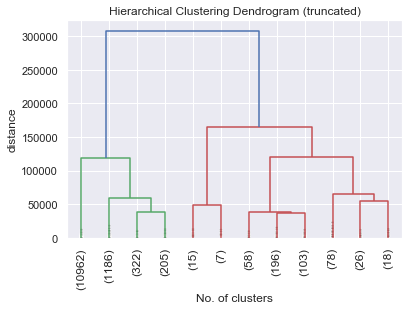

Last 12 cluster distances: [ 33169.18751606  36780.95858719  38261.19844806  39148.81566618
  48985.23190319  55519.08768835  60060.49786496  64799.25671197
 118495.20065233 120258.07689223 164875.6338503  308008.33801865]


In [364]:
agg_cluster(features_scaled_2)

In [392]:
agg_ward,as_ward = agg_clust(features_scaled_2,n=3,affinity='euclidean',linkage='ward')
as_ward

array([0, 0, 0, ..., 0, 2, 0])

In [393]:
ward_labels = agg_ward.labels_

In [397]:
metrics.calinski_harabaz_score(cluster_df_2,ward_labels)

3358.636839242137

In [398]:
metrics.silhouette_score(cluster_df_2,ward_labels) 

0.3289289601595949

In [394]:
df_ward_2 = g_tag_test.copy()
df_ward_2['Cluster'] = as_ward
df_ward_2.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [396]:
df_ward_2.loc[df_ward_2.Cluster == 1]

movieId                                              title  \
11          12                 Dracula: Dead and Loving It (1995)   
14          15                            Cutthroat Island (1995)   
18          19              Ace Ventura: When Nature Calls (1995)   
43          44                               Mortal Kombat (1995)   
54          56                     Kids of the Round Table (1995)   
63          65                                    Bio-Dome (1996)   
64          66          Lawnmower Man 2: Beyond Cyberspace (1996)   
69          71                                   Fair Game (1995)   
73          75                                   Big Bully (1996)   
85          87                           Dunston Checks In (1996)   
90          93                         Vampire in Brooklyn (1995)   
92          95                                Broken Arrow (1996)   
95          98                                    Shopping (1994)   
99         102                                   Mr. Wrong (1996)   
122        126                  NeverEnding Story III, The (1994)   
147        157                              Canadian Bacon (1995)   
150        160                                       Congo (1995)   
156        166                        Doom Generation, The (1995)   
159        169            Free Willy 2: The Adventure Home (1995)   
160        170                                     Hackers (1995)   
163        173                                 Judge Dredd (1995)   
164        174                                   Jury Duty (1995)   
171        181     Mighty Morphin Power Rangers: The Movie (1995)   
175        185                                    Net, The (1995)   
183        193                                   Showgirls (1995)   
194        204               Under Siege 2: Dark Territory (1995)   
202        212                                 Bushwhacked (1995)   
210        220                                Castle Freak (1995)   
216        228                  Destiny Turns on the Radio (1995)   
222        234                                Exit to Eden (1994)   
231        243                                       Gordy (1995)   
232        244                            Gumby: The Movie (1995)   
243        255                             Jerky Boys, The (1995)   
263        275                                  Mixed Nuts (1994)   
272        285                               Beyond Bedlam (1993)   
273        286                           Nemesis 2: Nebula (1995)   
278        291                               Poison Ivy II (1996)   
292        305               Ready to Wear (Pret-A-Porter) (1994)   
297        310                                  Rent-a-Kid (1995)   
299        312                     Stuart Saves His Family (1995)   
311        325              National Lampoon's Senior Trip (1995)   
313        327                                   Tank Girl (1995)   
318        332                       Village of the Damned (1995)   
324        338                                  Virtuosity (1995)   
329        343                      Baby-Sitters Club, The (1995)   
341        355                            Flintstones, The (1994)   
379        393                              Street Fighter (1994)   
381        397                                   Fear, The (1995)   
385        405  Highlander III: The Sorcerer (a.k.a. Highlande...   
391        411               Martin Lawrence: You So Crazy (1994)   
393        413                                    Airheads (1994)   
403        423                                  Blown Away (1994)   
407        427                               Boxing Helena (1993)   
409        429                                   Cabin Boy (1994)   
410        430                               Calendar Girl (1993)   
414        434                                 Cliffhanger (1993)   
415        435                                   Coneheads (1993)   
416  

In [384]:
df_ward_2.loc[df_ward_2.imdbId == 'tt0097388']

movieId                                              title  genres  \
1746     1981  Friday the 13th Part VIII: Jason Takes Manhatt...  Horror   

         imdbId tmdbId  (count, 0.5)  (count, 1.0)  (count, 1.5)  \
1746  tt0097388  10283         164.0         476.0          67.0   

      (count, 2.0)  (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  \
1746         253.0          90.0         182.0          46.0          61.0   

      (count, 4.5)  (count, 5.0)   Cheesy     Cult  Cult Classic  Cult Film  \
1746           8.0          23.0  0.45825  0.07925       0.18225    0.41975   

      Low Budget  Scifi Cult  So bad its funny  So bad its good  \
1746     0.15675     0.02825             0.431           0.0795   

      Unintentionally funny  total_count  percent_0.5to1  percent_4.5to5  \
1746                0.23075       1370.0        0.467153        0.022628   

      percent_polarity  total_tails  Cluster  
1746          0.444526     0.489781        1

Cophenet Correlation: 0.9620457222735435


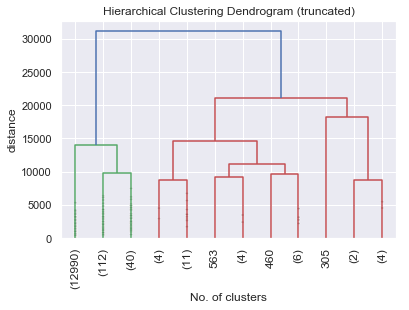

Last 12 cluster distances: [ 8502.40267608  8760.08482414  8815.72202502  9164.89811311
  9592.67216557  9829.72247253 11204.14571864 14033.94441078
 14622.12776189 18214.21450352 21026.08578506 31185.37664853]


In [374]:
agg_cluster(features_scaled_2,'average')

In [399]:
agg_avg,as_avg = agg_clust(features_scaled_2,n=3,affinity='euclidean',linkage='average')
df_avg_2 = g_tag_test.copy()
df_avg_2['Cluster'] = as_avg
df_avg_2.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [403]:
avg_labels = agg_avg.labels_

In [407]:
def cluster_scores(df,labels):
    print(metrics.calinski_harabaz_score(df,labels))
    print(metrics.silhouette_score(df,labels))

In [408]:
cluster_scores(cluster_df_2,avg_labels)

39.090756510406294
0.6424932452749268


In [400]:
df_avg_2.loc[df_avg_2.imdbId == 'tt0368226']

movieId             title                genres     imdbId tmdbId  \
10113    74754  Room, The (2003)  Comedy|Drama|Romance  tt0368226  17473   

       (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
10113         151.0          81.0          29.0          41.0          22.0   

       (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
10113          53.0          45.0          55.0          24.0          93.0   

        Cheesy    Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
10113  0.13125  0.2365         0.622     0.8735      0.4445      0.0655   

       So bad its funny  So bad its good  Unintentionally funny  total_count  \
10113            0.8505           0.8165                  0.781        594.0   

       percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  Cluster  
10113        0.390572         0.19697          0.193603     0.587542        1

In [386]:
df_avg_2.loc[df_avg_2.Cluster == 0]

movieId                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
3            4                           Waiting to Exhale (1995)   
4            5                 Father of the Bride Part II (1995)   
5            6                                        Heat (1995)   
6            7                                     Sabrina (1995)   
7            8                                Tom and Huck (1995)   
8            9                                Sudden Death (1995)   
9           10                                   GoldenEye (1995)   
10          11                     American President, The (1995)   
11          12                 Dracula: Dead and Loving It (1995)   
12          13                                       Balto (1995)   
13          14                                       Nixon (1995)   
14          15                            Cutthroat Island (1995)   
15          16                                      Casino (1995)   
16          17                       Sense and Sensibility (1995)   
17          18                                  Four Rooms (1995)   
18          19              Ace Ventura: When Nature Calls (1995)   
19          20                                 Money Train (1995)   
20          21                                  Get Shorty (1995)   
21          22                                     Copycat (1995)   
22          23                                   Assassins (1995)   
23          24                                      Powder (1995)   
24          25                           Leaving Las Vegas (1995)   
25          26                                     Othello (1995)   
26          27                                Now and Then (1995)   
27          28                                  Persuasion (1995)   
28          29  City of Lost Children, The (Cité des enfants p...   
29          30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30          31                             Dangerous Minds (1995)   
31          32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32          33                            Wings of Courage (1995)   
33          34                                        Babe (1995)   
34          35                                  Carrington (1995)   
35          36                            Dead Man Walking (1995)   
36          37                      Across the Sea of Time (1995)   
37          38                                It Takes Two (1995)   
38          39                                    Clueless (1995)   
39          40                    Cry, the Beloved Country (1995)   
40          41                                 Richard III (1995)   
41          42                             Dead Presidents (1995)   
42          43                                 Restoration (1995)   
43          44                               Mortal Kombat (1995)   
44          45                                  To Die For (1995)   
45          46               How to Make an American Quilt (1995)   
46          47                        Seven (a.k.a. Se7en) (1995)   
47          48                                  Pocahontas (1995)   
48          49                       When Night Is Falling (1995)   
49          50                         Usual Suspects, The (1995)   
50          52                            Mighty Aphrodite (1995)   
51          53                                    Lamerica (1994)   
52          54                              Big Green, The (1995)   
53          55                                     Georgia (1995)   
54          56                     Kids of the Round Table (1995)   
55          57                       Home for the Holidays (1995)   
56          58                  Postman, The (Postino, Il) (1994)   
57   

In [381]:
df_avg_2['So bad its good'].nlargest(10)

10703    0.89750
2104     0.86075
7291     0.85750
5396     0.85475
9863     0.83825
1689     0.83425
8387     0.82825
10113    0.81650
11477    0.78150
1503     0.76900
Name: So bad its good, dtype: float64

In [387]:
avg_pred_3 = agg_clust(features_scaled_2,n=2,affinity='euclidean',linkage='average')
df_avg_3 = g_tag_test.copy()
df_avg_3['Cluster'] = avg_pred_3
df_avg_3.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [388]:
df_avg_3.loc[df_avg_3.imdbId == 'tt0368226']

movieId             title                genres     imdbId tmdbId  \
10113    74754  Room, The (2003)  Comedy|Drama|Romance  tt0368226  17473   

       (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
10113         151.0          81.0          29.0          41.0          22.0   

       (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
10113          53.0          45.0          55.0          24.0          93.0   

        Cheesy    Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
10113  0.13125  0.2365         0.622     0.8735      0.4445      0.0655   

       So bad its funny  So bad its good  Unintentionally funny  total_count  \
10113            0.8505           0.8165                  0.781        594.0   

       percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  Cluster  
10113        0.390572         0.19697          0.193603     0.587542        0

In [389]:
df_avg_3.loc[df_avg_3.Cluster == 0]

movieId                              title                genres  \
1689      1924     Plan 9 from Outer Space (1959)         Horror|Sci-Fi   
3216      3593           Battlefield Earth (2000)         Action|Sci-Fi   
7291     26157    Manos: The Hands of Fate (1966)                Horror   
9863     70946                     Troll 2 (1990)        Fantasy|Horror   
10113    74754                   Room, The (2003)  Comedy|Drama|Romance   
10703    89281  Birdemic: Shock and Terror (2010)      Romance|Thriller   

          imdbId tmdbId  (count, 0.5)  (count, 1.0)  (count, 1.5)  \
1689   tt0052077  10513         147.0         561.0         104.0   
3216   tt0185183   5491        1088.0        1673.0         321.0   
7291   tt0060666  22293          40.0          15.0           3.0   
9863   tt0105643  26914          57.0          25.0          24.0   
10113  tt0368226  17473         151.0          81.0          29.0   
10703  tt1316037  40016          51.0          21.0           1.0   

       (count, 2.0)  (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  \
1689          331.0         105.0         413.0          97.0         423.0   
3216          692.0         229.0         486.0         179.0         206.0   
7291           12.0           3.0           5.0           4.0           5.0   
9863           19.0           6.0          15.0          14.0          21.0   
10113          41.0          22.0          53.0          45.0          55.0   
10703           4.0           4.0           1.0           4.0           5.0   

       (count, 4.5)  (count, 5.0)   Cheesy     Cult  Cult Classic  Cult Film  \
1689           45.0         272.0  0.41850  0.49400       0.93325    0.92950   
3216           43.0          48.0  0.50850  0.17150       0.35750    0.54675   
7291            4.0           9.0  0.20600  0.81300       0.67775    0.84450   
9863           10.0          24.0  0.29800  0.26675       0.66875    0.79375   
10113          24.0          93.0  0.13125  0.23650       0.62200    0.87350   
10703           1.0          10.0  0.25900  0.54175       0.49000    0.85175   

       Low Budget  Scifi Cult  So bad its funny  So bad its good  \
1689      0.78325     0.19875           0.93400          0.83425   
3216      0.20150     1.00000           0.90425          0.46525   
7291      0.58050     0.10200           0.91800          0.85750   
9863      0.59875     0.05725           0.93125          0.83825   
10113     0.44450     0.06550           0.85050          0.81650   
10703     0.63375     0.05475           0.95250          0.89750   

       Unintentionally funny  total_count  percent_0.5to1  percent_4.5to5  \
1689                 0.44550       2498.0        0.283427        0.126902   
3216                 0.46225       4965.0        0.556093        0.018328   
7291                 0.80675        100.0        0.550000        0.130000   
9863                 0.47375        215.0        0.381395        0.158140   
10113                0.78100        594.0        0.390572        0.196970   
10703                0.78275        102.0        0.705882        0.107843   

       percent_polarity  total_tails  Cluster  
1689           0.156525     0.410328        0  
3216           0.537764     0.574421        0  
7291           0.420000     0.680000        0  
9863           0.223256     0.539535        0  
10113          0.193603     0.587542        0  
10703          0.598039     0.813725        0

### Feature exploration - best option.

#### Removing 'So bad its good' and 'So bad its funny'.

In [409]:
cols = ['Cheesy','Cult','Cult Classic','Cult Film','Low Budget','Scifi Cult','Unintentionally funny','percent_0.5to1','percent_4.5to5','percent_polarity','total_tails']
cluster_test = cluster_df[cols]
cluster_test.head()

Cheesy     Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
movieId                                                                      
1        0.07500  0.21400       0.30725    0.21925     0.07300     0.11750   
2        0.19625  0.11075       0.11025    0.19675     0.04200     0.04500   
3        0.06900  0.04100       0.10225    0.17550     0.02775     0.04600   
4        0.07775  0.04275       0.10675    0.21600     0.05475     0.02800   
5        0.08750  0.02750       0.08375    0.17825     0.02875     0.02925   

         Unintentionally funny  percent_0.5to1  percent_4.5to5  \
movieId                                                          
1                      0.01875        0.019250        0.323957   
2                      0.04200        0.040121        0.107910   
3                      0.03425        0.061020        0.105871   
4                      0.03725        0.133824        0.074607   
5                      0.03850        0.067856        0.085240   

         percent_polarity  total_tails  
movieId                                 
1               -0.304707     0.343206  
2               -0.067789     0.148031  
3               -0.044851     0.166891  
4                0.059217     0.208431  
5               -0.017384     0.153096

In [410]:
scaler = StandardScaler()
test1_scaled = scaler.fit_transform(cluster_test)
test1_features = pd.DataFrame(test1_scaled, columns=cluster_test.columns)

Cophenet Correlation: 0.9620457222735435


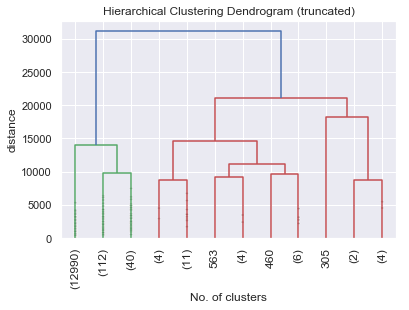

Last 12 cluster distances: [ 8502.40267608  8760.08482414  8815.72202502  9164.89811311
  9592.67216557  9829.72247253 11204.14571864 14033.94441078
 14622.12776189 18214.21450352 21026.08578506 31185.37664853]


In [411]:
agg_cluster(test1_features,'average')

In [415]:
test_avg,as_avg = agg_clust(test1_features,n=3,affinity='euclidean',linkage='average')
df_test_avg = g_tag_test.copy()
df_test_avg['Cluster'] = as_avg
df_test_avg.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [419]:
df_test_avg.loc[df_test_avg.Cluster == 1]

movieId                              title                    genres  \
1415      1587         Conan the Barbarian (1982)  Action|Adventure|Fantasy   
7291     26157    Manos: The Hands of Fate (1966)                    Horror   
10113    74754                   Room, The (2003)      Comedy|Drama|Romance   
10703    89281  Birdemic: Shock and Terror (2010)          Romance|Thriller   

          imdbId tmdbId  (count, 0.5)  (count, 1.0)  (count, 1.5)  \
1415   tt0082198   9387         195.0         437.0         198.0   
7291   tt0060666  22293          40.0          15.0           3.0   
10113  tt0368226  17473         151.0          81.0          29.0   
10703  tt1316037  40016          51.0          21.0           1.0   

       (count, 2.0)  (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  \
1415          948.0         487.0        1998.0         931.0        1891.0   
7291           12.0           3.0           5.0           4.0           5.0   
10113          41.0          22.0          53.0          45.0          55.0   
10703           4.0           4.0           1.0           4.0           5.0   

       (count, 4.5)  (count, 5.0)   Cheesy     Cult  Cult Classic  Cult Film  \
1415          402.0         771.0  0.40250  0.90750       0.87750    0.80575   
7291            4.0           9.0  0.20600  0.81300       0.67775    0.84450   
10113          24.0          93.0  0.13125  0.23650       0.62200    0.87350   
10703           1.0          10.0  0.25900  0.54175       0.49000    0.85175   

       Low Budget  Scifi Cult  So bad its funny  So bad its good  \
1415      0.25425     0.37450           0.35225          0.12825   
7291      0.58050     0.10200           0.91800          0.85750   
10113     0.44450     0.06550           0.85050          0.81650   
10703     0.63375     0.05475           0.95250          0.89750   

       Unintentionally funny  total_count  percent_0.5to1  percent_4.5to5  \
1415                 0.68100       8258.0        0.076532        0.142044   
7291                 0.80675        100.0        0.550000        0.130000   
10113                0.78100        594.0        0.390572        0.196970   
10703                0.78275        102.0        0.705882        0.107843   

       percent_polarity  total_tails  Cluster  
1415          -0.065512     0.218576        1  
7291           0.420000     0.680000        1  
10113          0.193603     0.587542        1  
10703          0.598039     0.813725        1

#### Trying to remove all except for two engineered columns.

In [420]:
cols = ['percent_polarity','total_tails']
cluster_test_2 = cluster_df[cols]
cluster_test_2.head()

percent_polarity  total_tails
movieId                               
1               -0.304707     0.343206
2               -0.067789     0.148031
3               -0.044851     0.166891
4                0.059217     0.208431
5               -0.017384     0.153096

In [421]:
scaler = StandardScaler()
test2_scaled = scaler.fit_transform(cluster_test_2)
test2_features = pd.DataFrame(test2_scaled, columns=cluster_test_2.columns)

Cophenet Correlation: 0.9620457222735435


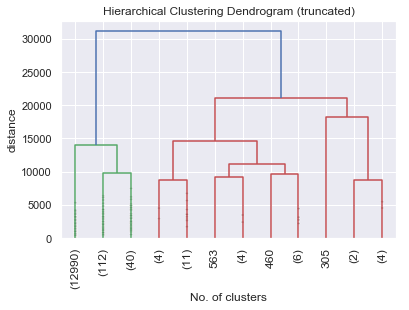

Last 12 cluster distances: [ 8502.40267608  8760.08482414  8815.72202502  9164.89811311
  9592.67216557  9829.72247253 11204.14571864 14033.94441078
 14622.12776189 18214.21450352 21026.08578506 31185.37664853]


In [422]:
agg_cluster(test2_features,'average')

In [423]:
test2_avg,as2_avg = agg_clust(test2_features,n=3,affinity='euclidean',linkage='average')
df_test2_avg = g_tag_test.copy()
df_test2_avg['Cluster'] = as2_avg
df_test2_avg.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [430]:
df_test2_avg.loc[df_test2_avg.Cluster == 2]

movieId                                              title  \
54          56                     Kids of the Round Table (1995)   
171        181     Mighty Morphin Power Rangers: The Movie (1995)   
738        810                                      Kazaam (1996)   
1185      1311                          Santa with Muscles (1996)   
1194      1322            Amityville 1992: It's About Time (1992)   
1195      1323                              Amityville 3-D (1983)   
1196      1324                       Amityville: Dollhouse (1996)   
1197      1325                Amityville: A New Generation (1993)   
1200      1328                       Amityville Curse, The (1990)   
1207      1335                                 Blood Beach (1981)   
1252      1383                    Adrenalin: Fear the Rush (1996)   
1344      1490                                     B*A*P*S (1997)   
1346      1495                Turbo: A Power Rangers Movie (1997)   
1423      1595                    Free Willy 3: The Rescue (1997)   
1427      1599                                       Steel (1997)   
1501      1679                       Chairman of the Board (1998)   
1546      1739        3 Ninjas: High Noon On Mega Mountain (1998)   
1561      1760                                 Spice World (1997)   
1602      1826                    Barney's Great Adventure (1998)   
1621      1853  Alan Smithee Film: Burn Hollywood Burn, An (1997)   
1653      1886                           I Got the Hook Up (1998)   
1746      1981  Friday the 13th Part VIII: Jason Takes Manhatt...   
1749      1984          Halloween III: Season of the Witch (1982)   
1754      1989               Prom Night III: The Last Kiss (1989)   
1755      1990         Prom Night IV: Deliver Us From Evil (1992)   
2008      2258                                 Master, The (1984)   
2110      2368                             King Kong Lives (1986)   
2125      2383          Police Academy 6: City Under Siege (1989)   
2128      2386                  Jerry Springer: Ringmaster (1998)   
2190      2449                Garbage Pail Kids Movie, The (1987)   
2193      2452                   Gate II: Trespassers, The (1990)   
2203      2462  Texas Chainsaw Massacre: The Next Generation (...   
2253      2516                    Children of the Corn III (1994)   
2290      2555                               Baby Geniuses (1999)   
2376      2655       Howling II: Your Sister Is a Werewolf (1985)   
2515      2799                             Problem Child 2 (1991)   
2532      2817                        Aces: Iron Eagle III (1992)   
2533      2818                               Iron Eagle IV (1995)   
2598      2887                                   Simon Sez (1999)   
2678      2974                                        Bats (1999)   
2727      3026                              Slaughterhouse (1987)   
2741      3041                           Meatballs Part II (1984)   
2742      3042                               Meatballs III (1987)   
2743      3043                                 Meatballs 4 (1992)   
2855      3166                                Brenda Starr (1989)   
3032      3390                           Shanghai Surprise (1986)   
3072      3433                 Death Wish 4: The Crackdown (1987)   
3073      3434             Death Wish 5: The Face of Death (1994)   
3076      3437                                 Cool as Ice (1991)   
3198      3572                                   Carnosaur (1993)   
3199      3573                                 Carnosaur 2 (1995)   
3200      3574                 Carnosaur 3: Primal Species (1996)   
3216      3593                           Battlefield Earth (2000)   
3276      3663                             Puppet Master 4 (1993)   
3277      3664          Puppet Master 5: The Final Chapter (1994)   
3278      3665  Curse of the Puppet Master (Puppet Master 6: T...   
3279      3666       Retro Puppet Master (Puppet Master 7) (1999)   
3406 

In [551]:
df_test2_avg.loc[df_test2_avg.imdbId == 'tt0077247']

Empty DataFrame
Columns: [movieId, title, genres, imdbId, tmdbId, (count, 0.5), (count, 1.0), (count, 1.5), (count, 2.0), (count, 2.5), (count, 3.0), (count, 3.5), (count, 4.0), (count, 4.5), (count, 5.0), Cheesy, Cult, Cult Classic, Cult Film, Low Budget, Scifi Cult, So bad its funny, So bad its good, Unintentionally funny, total_count, percent_0.5to1, percent_4.5to5, percent_polarity, total_tails, Cluster]
Index: []

In [448]:
test_2_labels = test2_avg.labels_
cluster_scores(cluster_test_2,test_2_labels)

937.7547821984986
0.610747592519407


In [523]:
df_test2_avg.drop(df_test2_avg.index[[5117,5124]])
df_test2_avg

movieId                                              title  \
0          1                                   Toy Story (1995)   
1          2                                     Jumanji (1995)   
2          3                            Grumpier Old Men (1995)   
3          4                           Waiting to Exhale (1995)   
4          5                 Father of the Bride Part II (1995)   
5          6                                        Heat (1995)   
6          7                                     Sabrina (1995)   
7          8                                Tom and Huck (1995)   
8          9                                Sudden Death (1995)   
9         10                                   GoldenEye (1995)   
10        11                     American President, The (1995)   
11        12                 Dracula: Dead and Loving It (1995)   
12        13                                       Balto (1995)   
13        14                                       Nixon (1995)   
14        15                            Cutthroat Island (1995)   
15        16                                      Casino (1995)   
16        17                       Sense and Sensibility (1995)   
17        18                                  Four Rooms (1995)   
18        19              Ace Ventura: When Nature Calls (1995)   
19        20                                 Money Train (1995)   
20        21                                  Get Shorty (1995)   
21        22                                     Copycat (1995)   
22        23                                   Assassins (1995)   
23        24                                      Powder (1995)   
24        25                           Leaving Las Vegas (1995)   
25        26                                     Othello (1995)   
26        27                                Now and Then (1995)   
27        28                                  Persuasion (1995)   
28        29  City of Lost Children, The (Cité des enfants p...   
29        30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30        31                             Dangerous Minds (1995)   
31        32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32        33                            Wings of Courage (1995)   
33        34                                        Babe (1995)   
34        35                                  Carrington (1995)   
35        36                            Dead Man Walking (1995)   
36        37                      Across the Sea of Time (1995)   
37        38                                It Takes Two (1995)   
38        39                                    Clueless (1995)   
39        40                    Cry, the Beloved Country (1995)   
40        41                                 Richard III (1995)   
41        42                             Dead Presidents (1995)   
42        43                                 Restoration (1995)   
43        44                               Mortal Kombat (1995)   
44        45                                  To Die For (1995)   
45        46               How to Make an American Quilt (1995)   
46        47                        Seven (a.k.a. Se7en) (1995)   
47        48                                  Pocahontas (1995)   
48        49                       When Night Is Falling (1995)   
49        50                         Usual Suspects, The (1995)   
50        52                            Mighty Aphrodite (1995)   
51        53                                    Lamerica (1994)   
52        54                              Big Green, The (1995)   
53        55                                     Georgia (1995)   
54        56                     Kids of the Round Table (1995)   
55        57                       Home for the Holidays (1995)   
56        58                  Postman, The (Postino, Il) (1994)   
57        59       Confessional, The (Confessionnal, Le) (1995)   
58        60                 Indian in the Cupboard,

In [664]:
print(df_test2_avg['So bad its funny'].mean())
print(good_bad_df['So bad its funny'].mean())

0.2919819178809962
0.6627207031249999


In [665]:
print(df_test2_avg['So bad its good'].mean())
print(good_bad_df['So bad its good'].mean())

0.03552878339404962
0.16074999999999998


In [674]:
df_show = pd.DataFrame()

In [ ]:
df_show

In [538]:
good_bad_df = df_test2_avg.loc[df_test2_avg.Cluster == 2]
good_bad_df.reset_index(inplace=True)
good_bad_df.head()

index  movieId                                           title  \
0     54       56                  Kids of the Round Table (1995)   
1    171      181  Mighty Morphin Power Rangers: The Movie (1995)   
2    738      810                                   Kazaam (1996)   
3   1185     1311                       Santa with Muscles (1996)   
4   1194     1322         Amityville 1992: It's About Time (1992)   

                              genres     imdbId  tmdbId  (count, 0.5)  \
0  Adventure|Children|Comedy|Fantasy  tt0113541  124057           4.0   
1                    Action|Children  tt0113820    9070         310.0   
2            Children|Comedy|Fantasy  tt0116756   11511         292.0   
3                             Comedy  tt0117550   31388           9.0   
4                             Horror  tt0103678   41671          28.0   

   (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  (count, 3.0)  \
0          33.0           2.0          15.0           2.0          11.0   
1         970.0          99.0         534.0         130.0         602.0   
2         732.0          97.0         344.0          92.0         379.0   
3          63.0           3.0          17.0           2.0          16.0   
4         138.0           7.0          52.0          10.0          46.0   

   (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)   Cheesy     Cult  \
0           2.0          12.0           0.0           2.0  0.07925  0.05750   
1          81.0         159.0          24.0          92.0  0.51800  0.04625   
2          45.0         103.0           3.0          71.0  0.69925  0.05125   
3           1.0           6.0           0.0          47.0  0.24975  0.03275   
4           6.0          12.0           1.0           9.0  0.22775  0.08275   

   Cult Classic  Cult Film  Low Budget  Scifi Cult  So bad its funny  \
0       0.11125    0.31900     0.05300     0.03125           0.41850   
1       0.16725    0.24025     0.06100     0.03125           0.60575   
2       0.22775    0.42125     0.05250     0.05100           0.83000   
3       0.09725    0.24875     0.03275     0.04525           0.47425   
4       0.15500    0.36000     0.17350     0.03300           0.40975   

   So bad its good  Unintentionally funny  total_count  percent_0.5to1  \
0          0.02000                0.01850         83.0        0.445783   
1          0.08200                0.06550       3001.0        0.426524   
2          0.28650                0.14700       2158.0        0.474513   
3          0.36900                0.05675        164.0        0.439024   
4          0.04625                0.03275        309.0        0.537217   

   percent_4.5to5  percent_polarity  total_tails  Cluster  
0        0.024096          0.421687     0.469880        2  
1        0.038654          0.387871     0.465178        2  
2        0.034291          0.440222     0.508804        2  
3        0.286585          0.152439     0.725610        2  
4        0.032362          0.504854     0.569579        2

In [539]:

good_bad_df.drop(good_bad_df.index[82:89],inplace=True)
good_bad_df.head(120)

index  movieId                                              title  \
0       54       56                     Kids of the Round Table (1995)   
1      171      181     Mighty Morphin Power Rangers: The Movie (1995)   
2      738      810                                      Kazaam (1996)   
3     1185     1311                          Santa with Muscles (1996)   
4     1194     1322            Amityville 1992: It's About Time (1992)   
5     1195     1323                              Amityville 3-D (1983)   
6     1196     1324                       Amityville: Dollhouse (1996)   
7     1197     1325                Amityville: A New Generation (1993)   
8     1200     1328                       Amityville Curse, The (1990)   
9     1207     1335                                 Blood Beach (1981)   
10    1252     1383                    Adrenalin: Fear the Rush (1996)   
11    1344     1490                                     B*A*P*S (1997)   
12    1346     1495                Turbo: A Power Rangers Movie (1997)   
13    1423     1595                    Free Willy 3: The Rescue (1997)   
14    1427     1599                                       Steel (1997)   
15    1501     1679                       Chairman of the Board (1998)   
16    1546     1739        3 Ninjas: High Noon On Mega Mountain (1998)   
17    1561     1760                                 Spice World (1997)   
18    1602     1826                    Barney's Great Adventure (1998)   
19    1621     1853  Alan Smithee Film: Burn Hollywood Burn, An (1997)   
20    1653     1886                           I Got the Hook Up (1998)   
21    1746     1981  Friday the 13th Part VIII: Jason Takes Manhatt...   
22    1749     1984          Halloween III: Season of the Witch (1982)   
23    1754     1989               Prom Night III: The Last Kiss (1989)   
24    1755     1990         Prom Night IV: Deliver Us From Evil (1992)   
25    2008     2258                                 Master, The (1984)   
26    2110     2368                             King Kong Lives (1986)   
27    2125     2383          Police Academy 6: City Under Siege (1989)   
28    2128     2386                  Jerry Springer: Ringmaster (1998)   
29    2190     2449                Garbage Pail Kids Movie, The (1987)   
30    2193     2452                   Gate II: Trespassers, The (1990)   
31    2203     2462  Texas Chainsaw Massacre: The Next Generation (...   
32    2253     2516                    Children of the Corn III (1994)   
33    2290     2555                               Baby Geniuses (1999)   
34    2376     2655       Howling II: Your Sister Is a Werewolf (1985)   
35    2515     2799                             Problem Child 2 (1991)   
36    2532     2817                        Aces: Iron Eagle III (1992)   
37    2533     2818                               Iron Eagle IV (1995)   
38    2598     2887                                   Simon Sez (1999)   
39    2678     2974                                        Bats (1999)   
40    2727     3026                              Slaughterhouse (1987)   
41    2741     3041                           Meatballs Part II (1984)   
42    2742     3042                               Meatballs III (1987)   
43    2743     3043                                 Meatballs 4 (1992)   
44    2855     3166                                Brenda Starr (1989)   
45    3032     3390                           Shanghai Surprise (1986)   
46    3072     3433                 Death Wish 4: The Crackdown (1987)   
47    3073     3434             Death Wish 5: The Face of Death (1994)   
48    3076     3437                                 Cool as Ice (1991)   
49    3198     3572                                   Carnosaur (1993)   
50    3199     3573                                 Carnosaur 2 (1995)   
51    3200     3574                 Carnosaur 3: Primal Species (1996)   
52    3216     3593                           Battlefield Earth (2000)   
53    327

In [535]:
len(good_bad_df)

127

In [540]:
good_bad_df.to_csv('good_bad_movie_list.csv')

In [541]:
len(good_bad_df)

128

### Trying out one additional permutation.

In [515]:
cols = ['So bad its funny','percent_polarity','total_tails','So bad its good']
cluster_test_3 = cluster_df[cols]
cluster_test_3.head()

So bad its funny  percent_polarity  total_tails  So bad its good
movieId                                                                  
1                 0.13650         -0.304707     0.343206          0.01150
2                 0.28000         -0.067789     0.148031          0.02125
3                 0.22900         -0.044851     0.166891          0.03375
4                 0.28075          0.059217     0.208431          0.01600
5                 0.24200         -0.017384     0.153096          0.01750

In [516]:
scaler = StandardScaler()
test3_scaled = scaler.fit_transform(cluster_test_3)
test3_features = pd.DataFrame(test3_scaled, columns=cluster_test_3.columns)

Cophenet Correlation: 0.9620457222735435


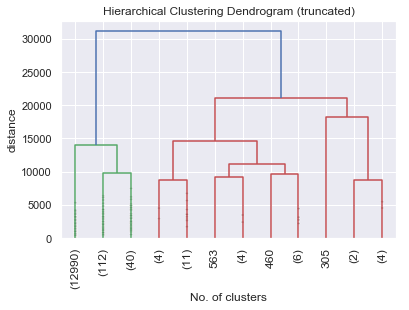

Last 12 cluster distances: [ 8502.40267608  8760.08482414  8815.72202502  9164.89811311
  9592.67216557  9829.72247253 11204.14571864 14033.94441078
 14622.12776189 18214.21450352 21026.08578506 31185.37664853]


In [517]:
agg_cluster(test3_features,'average')

In [518]:
test3_avg,as3_avg = agg_clust(test3_features,n=3,affinity='euclidean',linkage='average')
df_test3_avg = g_tag_test.copy()
df_test3_avg['Cluster'] = as3_avg
df_test3_avg.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [522]:
df_test3_avg.loc[df_test3_avg.Cluster == 1]

movieId                                title  \
183        193                     Showgirls (1995)   
1503      1681   Mortal Kombat: Annihilation (1997)   
1689      1924       Plan 9 from Outer Space (1959)   
1927      2164           Surf Nazis Must Die (1987)   
2104      2362                Glen or Glenda (1953)   
2191      2450               Howard the Duck (1986)   
3588      3997            Dungeons & Dragons (2000)   
5396      6099                     Megaforce (1982)   
6081      6995          Hercules in New York (1970)   
6300      7244     Beast of Yucca Flats, The (1961)   
7291     26157      Manos: The Hands of Fate (1966)   
7797     31424             Alone in the Dark (2005)   
7816     31555                    Mac and Me (1988)   
8387     44243        Leprechaun 4: In Space (1997)   
9863     70946                       Troll 2 (1990)   
10054    73829  Mega Shark vs. Giant Octopus (2009)   
10113    74754                     Room, The (2003)   
10703    89281    Birdemic: Shock and Terror (2010)   
11477   103813              Miami Connection (1987)   

                                genres     imdbId tmdbId  (count, 0.5)  \
183                              Drama  tt0114436  10802         671.0   
1503          Action|Adventure|Fantasy  tt0119707   9823         277.0   
1689                     Horror|Sci-Fi  tt0052077  10513         147.0   
1927        Action|Comedy|Drama|Horror  tt0094077  28070          14.0   
2104                             Drama  tt0045826  24018          20.0   
2191           Adventure|Comedy|Sci-Fi  tt0091225  10658         258.0   
3588   Action|Adventure|Comedy|Fantasy  tt0190374  11849         270.0   
5396                     Action|Sci-Fi  tt0084316  27380           9.0   
6081             Action|Comedy|Fantasy  tt0065832   5227          47.0   
6300                     Horror|Sci-Fi  tt0054673  22727          21.0   
7291                            Horror  tt0060666  22293          40.0   
7797     Action|Horror|Sci-Fi|Thriller  tt0369226  12142         173.0   
7816           Children|Fantasy|Sci-Fi  tt0095560  20196          27.0   
8387      Comedy|Fantasy|Horror|Sci-Fi  tt0116861  19287          16.0   
9863                    Fantasy|Horror  tt0105643  26914          57.0   
10054                    Action|Horror  tt1350498  17911          37.0   
10113             Comedy|Drama|Romance  tt0368226  17473         151.0   
10703                 Romance|Thriller  tt1316037  40016          51.0   
11477                     Action|Crime  tt0092549  59558           2.0   

       (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  (count, 3.0)  \
183          2095.0         465.0        1712.0         519.0        1919.0   
1503          631.0         178.0         461.0         245.0         403.0   
1689          561.0         104.0         331.0         105.0         413.0   
1927           63.0          11.0          57.0          11.0          47.0   
2104           76.0          15.0          66.0          18.0          73.0   
2191         1081.0         203.0         970.0         217.0         770.0   
3588          537.0         217.0         481.0         208.0         418.0   
5396           18.0           8.0          20.0           7.0           7.0   
6081           36.0          40.0          43.0          24.0          21.0   
6300           19.0           8.0           8.0           5.0           5.0   
7291           15.0           3.0          12.0           3.0           5.0   
7797          122.0          68.0          79.0          38.0          47.0   
7816           24.0          19.0          22.0          22.0          25.0   
8387            4.0           7.0          12.0           5.0           7.0   
9863           25.0          24.0          19.0           6.0          15.0   
10054          23.0          15.0          14.0           5.0           6.0   
10113          81.0          29.0          41.0          22.0          53.0   
107

In [591]:
cols = ['So bad its funny','percent_polarity','So bad its good']
cluster_test_4 = cluster_df[cols]
cluster_test_4.head()

So bad its funny  percent_polarity  So bad its good
movieId                                                     
1                 0.13650         -0.304707          0.01150
2                 0.28000         -0.067789          0.02125
3                 0.22900         -0.044851          0.03375
4                 0.28075          0.059217          0.01600
5                 0.24200         -0.017384          0.01750

In [592]:
scaler = StandardScaler()
test4_scaled = scaler.fit_transform(cluster_test_4)
test4_features = pd.DataFrame(test4_scaled, columns=cluster_test_4.columns)

Cophenet Correlation: 0.9620457222735435


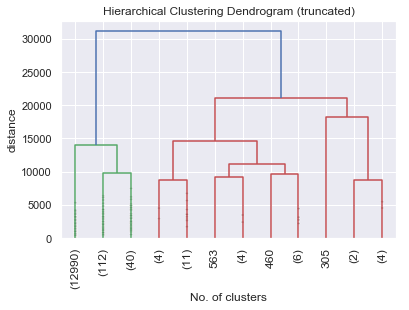

Last 12 cluster distances: [ 8502.40267608  8760.08482414  8815.72202502  9164.89811311
  9592.67216557  9829.72247253 11204.14571864 14033.94441078
 14622.12776189 18214.21450352 21026.08578506 31185.37664853]


In [593]:
agg_cluster(test4_features,'average')

In [594]:
test4_avg,as4_avg = agg_clust(test4_features,n=3,affinity='euclidean',linkage='average')
df_test4_avg = g_tag_test.copy()
df_test4_avg['Cluster'] = as4_avg
df_test4_avg.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [600]:
len(df_test4_avg.loc[df_test4_avg.Cluster == 2])

19

### Creating item-item recommender df.

In [542]:
collab_test = pd.read_csv('ml-latest/ratings.csv')

In [543]:
collab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [544]:
len(collab_test.loc[collab_test['movieId']==1760])

3193

In [545]:
movie_list = list(good_bad_df['movieId'])
mask = collab_test['movieId'].isin(movie_list) == True
gb_ratings = collab_test[mask]
len(gb_ratings)

63163

In [546]:
gb_ratings.head()

userId  movieId  rating   timestamp
90         4      181     0.5  1127946789
296        4     1760     0.5  1114050751
484        4     3593     1.0  1115782046
1631      19      181     2.0   836433987
2655      38     4125     1.0   982853654

In [547]:
len(gb_ratings.loc[gb_ratings['movieId']==1760])

3193

In [550]:
gb_ratings.to_csv('item_item_test.csv')

### Testing on larger data.

In [463]:
df_master['tmdbId'].fillna(value='N/A',inplace=True)
df_master.fillna(value=0,inplace=True)

In [465]:
df_master['total_count'] = df_master.iloc[:,5:15].sum(axis=1)
df_master['percent_0.5to1'] = (df_master.iloc[:,[5,6]].sum(axis=1)) / df_master['total_count']
df_master['percent_4.5to5'] = (df_master.iloc[:,[13,14]].sum(axis=1)) / df_master['total_count']
df_master['percent_polarity'] = df_master['percent_0.5to1'] - df_master['percent_4.5to5']
df_master['total_tails'] = df_master['percent_0.5to1'] + df_master['percent_4.5to5']
df_master.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
0       11872.0        6095.0       22710.0        5684.0       16497.0   
1        8711.0        3116.0        6303.0         790.0        2139.0   
2        6227.0         774.0        3440.0         159.0        1491.0   
3        1136.0          68.0         557.0          12.0         211.0   
4        6655.0         761.0        2989.0         174.0        1145.0   

   total_count  percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  
0      68469.0        0.019250        0.323957         -0.304707     0.343206  
1      27143.0        0.040121        0.107910         -0.067789     0.148031  
2      15585.0        0.061020        0.105871         -0.044851     0.166891  
3       2989.0        0.133824        0.074607          0.059217     0.208431  
4      15474.0        0.067856        0.085240         -0.017384     0.153096

In [466]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53889 entries, 0 to 53888
Data columns (total 20 columns):
movieId             53889 non-null int64
title               53889 non-null object
genres              53889 non-null object
imdbId              53889 non-null object
tmdbId              53889 non-null object
(count, 0.5)        53889 non-null float64
(count, 1.0)        53889 non-null float64
(count, 1.5)        53889 non-null float64
(count, 2.0)        53889 non-null float64
(count, 2.5)        53889 non-null float64
(count, 3.0)        53889 non-null float64
(count, 3.5)        53889 non-null float64
(count, 4.0)        53889 non-null float64
(count, 4.5)        53889 non-null float64
(count, 5.0)        53889 non-null float64
total_count         53889 non-null float64
percent_0.5to1      53889 non-null float64
percent_4.5to5      53889 non-null float64
percent_polarity    53889 non-null float64
total_tails         53889 non-null float64
dtypes: float64(15), int64(1), object

In [467]:
df_master.isnull().sum()

movieId             0
title               0
genres              0
imdbId              0
tmdbId              0
(count, 0.5)        0
(count, 1.0)        0
(count, 1.5)        0
(count, 2.0)        0
(count, 2.5)        0
(count, 3.0)        0
(count, 3.5)        0
(count, 4.0)        0
(count, 4.5)        0
(count, 5.0)        0
total_count         0
percent_0.5to1      0
percent_4.5to5      0
percent_polarity    0
total_tails         0
dtype: int64

In [567]:
df_trim = df_master.loc[df_master.total_count > 30]
df_trim.total_count.value_counts()

31.0       172
33.0       171
32.0       169
35.0       161
34.0       155
39.0       138
36.0       135
37.0       124
38.0       123
46.0       122
40.0       117
44.0       114
43.0       108
41.0       106
42.0       106
45.0       100
56.0        99
52.0        99
47.0        96
55.0        95
49.0        94
53.0        90
50.0        90
51.0        89
54.0        82
61.0        81
48.0        80
58.0        79
70.0        78
69.0        75
76.0        75
57.0        73
63.0        72
59.0        72
62.0        69
74.0        67
64.0        60
60.0        59
68.0        56
80.0        56
73.0        56
67.0        55
86.0        54
87.0        52
82.0        52
100.0       52
65.0        51
75.0        51
79.0        49
77.0        48
78.0        48
85.0        47
72.0        47
71.0        46
102.0       46
84.0        45
88.0        45
81.0        44
110.0       44
94.0        44
66.0        44
119.0       42
83.0        41
90.0        40
105.0       39
91.0        38
104.0     

In [569]:
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15751 entries, 0 to 53288
Data columns (total 20 columns):
movieId             15751 non-null int64
title               15751 non-null object
genres              15751 non-null object
imdbId              15751 non-null object
tmdbId              15751 non-null object
(count, 0.5)        15751 non-null float64
(count, 1.0)        15751 non-null float64
(count, 1.5)        15751 non-null float64
(count, 2.0)        15751 non-null float64
(count, 2.5)        15751 non-null float64
(count, 3.0)        15751 non-null float64
(count, 3.5)        15751 non-null float64
(count, 4.0)        15751 non-null float64
(count, 4.5)        15751 non-null float64
(count, 5.0)        15751 non-null float64
total_count         15751 non-null float64
percent_0.5to1      15751 non-null float64
percent_4.5to5      15751 non-null float64
percent_polarity    15751 non-null float64
total_tails         15751 non-null float64
dtypes: float64(15), int64(1), object

In [568]:
cols = ['percent_polarity','total_tails']
lg_test = df_trim[cols]
lg_test.head()

percent_polarity  total_tails
0         -0.304707     0.343206
1         -0.067789     0.148031
2         -0.044851     0.166891
3          0.059217     0.208431
4         -0.017384     0.153096

In [570]:
scaler = StandardScaler()
bigtest_scaled = scaler.fit_transform(lg_test)
bigtest_features = pd.DataFrame(bigtest_scaled, columns=lg_test.columns)

Cophenet Correlation: 0.9620457222735435


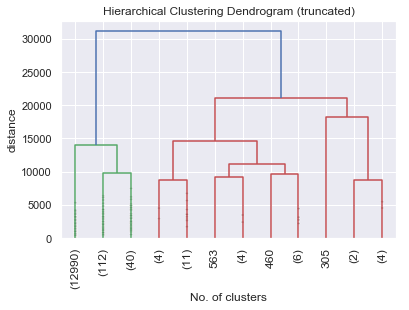

Last 12 cluster distances: [ 8502.40267608  8760.08482414  8815.72202502  9164.89811311
  9592.67216557  9829.72247253 11204.14571864 14033.94441078
 14622.12776189 18214.21450352 21026.08578506 31185.37664853]


In [571]:
agg_cluster(bigtest_features,'average')

In [659]:
bigtest_labels = bigtest_agg.labels_

In [663]:
metrics.silhouette_score(lg_test,bigtest_labels) 

0.6148706737304042

## ^^^FINAL SILHOUETTE SCORE ^^^

In [573]:
bigtest_agg,as_bigtest = tqdm(agg_clust(bigtest_features,n=3,affinity='euclidean',linkage='average'))
bigtest_avg = df_trim.copy()
bigtest_avg['Cluster'] = as_bigtest
bigtest_avg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15751 entries, 0 to 53288
Data columns (total 21 columns):
movieId             15751 non-null int64
title               15751 non-null object
genres              15751 non-null object
imdbId              15751 non-null object
tmdbId              15751 non-null object
(count, 0.5)        15751 non-null float64
(count, 1.0)        15751 non-null float64
(count, 1.5)        15751 non-null float64
(count, 2.0)        15751 non-null float64
(count, 2.5)        15751 non-null float64
(count, 3.0)        15751 non-null float64
(count, 3.5)        15751 non-null float64
(count, 4.0)        15751 non-null float64
(count, 4.5)        15751 non-null float64
(count, 5.0)        15751 non-null float64
total_count         15751 non-null float64
percent_0.5to1      15751 non-null float64
percent_4.5to5      15751 non-null float64
percent_polarity    15751 non-null float64
total_tails         15751 non-null float64
Cluster             15751 non-null i

In [577]:
bigtest_avg.loc[bigtest_avg.Cluster == 1].min()

movieId                                              title  \
55          56                     Kids of the Round Table (1995)   
179        181     Mighty Morphin Power Rangers: The Movie (1995)   
283        286                           Nemesis 2: Nebula (1995)   
585        591                            Tough and Deadly (1995)   
797        810                                      Kazaam (1996)   
1293      1322            Amityville 1992: It's About Time (1992)   
1294      1323                              Amityville 3-D (1983)   
1295      1324                       Amityville: Dollhouse (1996)   
1296      1325                Amityville: A New Generation (1993)   
1297      1326               Amityville II: The Possession (1982)   
1299      1328                       Amityville Curse, The (1990)   
1306      1335                                 Blood Beach (1981)   
1352      1383                    Adrenalin: Fear the Rush (1996)   
1358      1389                                    Jaws 3-D (1983)   
1399      1433                                 The Machine (1994)   
1450      1490                                     B*A*P*S (1997)   
1452      1495                Turbo: A Power Rangers Movie (1997)   
1543      1595                    Free Willy 3: The Rescue (1997)   
1547      1599                                       Steel (1997)   
1622      1679                       Chairman of the Board (1998)   
1648      1707                                Home Alone 3 (1997)   
1671      1731                                   Mr. Magoo (1997)   
1677      1739        3 Ninjas: High Noon On Mega Mountain (1998)   
1694      1760                                 Spice World (1997)   
1697      1765                    Letter From Death Row, A (1998)   
1743      1822                            Meet the Deedles (1998)   
1746      1826                    Barney's Great Adventure (1998)   
1771      1853  Alan Smithee Film: Burn Hollywood Burn, An (1997)   
1897      1980     Friday the 13th Part VII: The New Blood (1988)   
1898      1981  Friday the 13th Part VIII: Jason Takes Manhatt...   
1901      1984          Halloween III: Season of the Witch (1982)   
1906      1989               Prom Night III: The Last Kiss (1989)   
1907      1990         Prom Night IV: Deliver Us From Evil (1992)   
1915      1998                    Exorcist II: The Heretic (1977)   
2069      2152                    Air Bud: Golden Receiver (1998)   
2174      2258                                 Master, The (1984)   
2284      2368                             King Kong Lives (1986)   
2298      2382   Police Academy 5: Assignment: Miami Beach (1988)   
2299      2383          Police Academy 6: City Under Siege (1989)   
2302      2386                  Jerry Springer: Ringmaster (1998)   
2365      2449                Garbage Pail Kids Movie, The (1987)   
2368      2452                   Gate II: Trespassers, The (1990)   
2377      2461    Leatherface: Texas Chainsaw Massacre III (1990)   
2378      2462  Texas Chainsaw Massacre: The Next Generation (...   
2431      2515  Children of the Corn II: The Final Sacrifice (...   
2432      2516                    Children of the Corn III (1994)   
2471      2555                               Baby Geniuses (1999)   
2547      2631                            Frogs for Snakes (1998)   
2570      2655       Howling II: Your Sister Is a Werewolf (1985)   
2714      2799                             Problem Child 2 (1991)   
2722      2807               Universal Soldier: The Return (1999)   
2731      2816                               Iron Eagle II (1988)   
2732      2817                        Aces: Iron Eagle III (1992)   
2733      2818                               Iron Eagle IV (1995)   
2802      2887                                   Simon Sez (1999)   
2870      2955                             Penitentiary II (1982)   
2880      2965                             Omega Code, The (1999)   
2889 

In [585]:
bigtest_avg.loc[bigtest_avg.imdbId == 'tt0095560']

movieId              title                   genres     imdbId tmdbId  \
9734    31555  Mac and Me (1988)  Children|Fantasy|Sci-Fi  tt0095560  20196   

      (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
9734          27.0          24.0          19.0          22.0          22.0   

      (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
9734          25.0          11.0           3.0           3.0           4.0   

      total_count  percent_0.5to1  percent_4.5to5  percent_polarity  \
9734        160.0         0.31875         0.04375             0.275   

      total_tails  Cluster  
9734       0.3625        0

In [590]:
len(bigtest_avg.loc[bigtest_avg.Cluster == 1])

220

In [601]:
good_bad_df_2 = bigtest_avg.loc[bigtest_avg.Cluster == 1]
good_bad_df_2.reset_index(inplace=True)
good_bad_df_2.head()

index  movieId                                           title  \
0     55       56                  Kids of the Round Table (1995)   
1    179      181  Mighty Morphin Power Rangers: The Movie (1995)   
2    283      286                        Nemesis 2: Nebula (1995)   
3    585      591                         Tough and Deadly (1995)   
4    797      810                                   Kazaam (1996)   

                              genres     imdbId  tmdbId  (count, 0.5)  \
0  Adventure|Children|Comedy|Fantasy  tt0113541  124057           4.0   
1                    Action|Children  tt0113820    9070         310.0   
2             Action|Sci-Fi|Thriller  tt0113948   63105           8.0   
3              Action|Drama|Thriller  tt0114706   80350           0.0   
4            Children|Comedy|Fantasy  tt0116756   11511         292.0   

   (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  (count, 3.0)  \
0          33.0           2.0          15.0           2.0          11.0   
1         970.0          99.0         534.0         130.0         602.0   
2          38.0           3.0          30.0           2.0          18.0   
3          14.0           1.0           9.0           0.0           8.0   
4         732.0          97.0         344.0          92.0         379.0   

   (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  total_count  \
0           2.0          12.0           0.0           2.0         83.0   
1          81.0         159.0          24.0          92.0       3001.0   
2           2.0           8.0           0.0           5.0        114.0   
3           0.0           3.0           0.0           1.0         36.0   
4          45.0         103.0           3.0          71.0       2158.0   

   percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  Cluster  
0        0.445783        0.024096          0.421687     0.469880        1  
1        0.426524        0.038654          0.387871     0.465178        1  
2        0.403509        0.043860          0.359649     0.447368        1  
3        0.388889        0.027778          0.361111     0.416667        1  
4        0.474513        0.034291          0.440222     0.508804        1

In [603]:
good_bad_df_2.drop(good_bad_df_2.index[123:130],inplace=True)
good_bad_df_2.head(120)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


index  movieId                                              title  \
0       55       56                     Kids of the Round Table (1995)   
1      179      181     Mighty Morphin Power Rangers: The Movie (1995)   
2      283      286                           Nemesis 2: Nebula (1995)   
3      585      591                            Tough and Deadly (1995)   
4      797      810                                      Kazaam (1996)   
5     1293     1322            Amityville 1992: It's About Time (1992)   
6     1294     1323                              Amityville 3-D (1983)   
7     1295     1324                       Amityville: Dollhouse (1996)   
8     1296     1325                Amityville: A New Generation (1993)   
9     1297     1326               Amityville II: The Possession (1982)   
10    1299     1328                       Amityville Curse, The (1990)   
11    1306     1335                                 Blood Beach (1981)   
12    1352     1383                    Adrenalin: Fear the Rush (1996)   
13    1358     1389                                    Jaws 3-D (1983)   
14    1399     1433                                 The Machine (1994)   
15    1450     1490                                     B*A*P*S (1997)   
16    1452     1495                Turbo: A Power Rangers Movie (1997)   
17    1543     1595                    Free Willy 3: The Rescue (1997)   
18    1547     1599                                       Steel (1997)   
19    1622     1679                       Chairman of the Board (1998)   
20    1648     1707                                Home Alone 3 (1997)   
21    1671     1731                                   Mr. Magoo (1997)   
22    1677     1739        3 Ninjas: High Noon On Mega Mountain (1998)   
23    1694     1760                                 Spice World (1997)   
24    1697     1765                    Letter From Death Row, A (1998)   
25    1743     1822                            Meet the Deedles (1998)   
26    1746     1826                    Barney's Great Adventure (1998)   
27    1771     1853  Alan Smithee Film: Burn Hollywood Burn, An (1997)   
28    1897     1980     Friday the 13th Part VII: The New Blood (1988)   
29    1898     1981  Friday the 13th Part VIII: Jason Takes Manhatt...   
30    1901     1984          Halloween III: Season of the Witch (1982)   
31    1906     1989               Prom Night III: The Last Kiss (1989)   
32    1907     1990         Prom Night IV: Deliver Us From Evil (1992)   
33    1915     1998                    Exorcist II: The Heretic (1977)   
34    2069     2152                    Air Bud: Golden Receiver (1998)   
35    2174     2258                                 Master, The (1984)   
36    2284     2368                             King Kong Lives (1986)   
37    2298     2382   Police Academy 5: Assignment: Miami Beach (1988)   
38    2299     2383          Police Academy 6: City Under Siege (1989)   
39    2302     2386                  Jerry Springer: Ringmaster (1998)   
40    2365     2449                Garbage Pail Kids Movie, The (1987)   
41    2368     2452                   Gate II: Trespassers, The (1990)   
42    2377     2461    Leatherface: Texas Chainsaw Massacre III (1990)   
43    2378     2462  Texas Chainsaw Massacre: The Next Generation (...   
44    2431     2515  Children of the Corn II: The Final Sacrifice (...   
45    2432     2516                    Children of the Corn III (1994)   
46    2471     2555                               Baby Geniuses (1999)   
47    2547     2631                            Frogs for Snakes (1998)   
48    2570     2655       Howling II: Your Sister Is a Werewolf (1985)   
49    2714     2799                             Problem Child 2 (1991)   
50    2722     2807               Universal Soldier: The Return (1999)   
51    2731     2816                               Iron Eagle II (1988)   
52    2732     2817                        Aces: Iron Eagle III (1992)   
53    273

In [604]:
movie_list = list(good_bad_df_2['movieId'])
mask_2 = collab_test['movieId'].isin(movie_list) == True
gb_ratings_2 = collab_test[mask_2]


63163

In [605]:
len(gb_ratings_2)

100668

In [606]:
gb_ratings_2.to_csv('item_item_final.csv')

In [607]:
good_bad_df_2

index  movieId                                              title  \
0       55       56                     Kids of the Round Table (1995)   
1      179      181     Mighty Morphin Power Rangers: The Movie (1995)   
2      283      286                           Nemesis 2: Nebula (1995)   
3      585      591                            Tough and Deadly (1995)   
4      797      810                                      Kazaam (1996)   
5     1293     1322            Amityville 1992: It's About Time (1992)   
6     1294     1323                              Amityville 3-D (1983)   
7     1295     1324                       Amityville: Dollhouse (1996)   
8     1296     1325                Amityville: A New Generation (1993)   
9     1297     1326               Amityville II: The Possession (1982)   
10    1299     1328                       Amityville Curse, The (1990)   
11    1306     1335                                 Blood Beach (1981)   
12    1352     1383                    Adrenalin: Fear the Rush (1996)   
13    1358     1389                                    Jaws 3-D (1983)   
14    1399     1433                                 The Machine (1994)   
15    1450     1490                                     B*A*P*S (1997)   
16    1452     1495                Turbo: A Power Rangers Movie (1997)   
17    1543     1595                    Free Willy 3: The Rescue (1997)   
18    1547     1599                                       Steel (1997)   
19    1622     1679                       Chairman of the Board (1998)   
20    1648     1707                                Home Alone 3 (1997)   
21    1671     1731                                   Mr. Magoo (1997)   
22    1677     1739        3 Ninjas: High Noon On Mega Mountain (1998)   
23    1694     1760                                 Spice World (1997)   
24    1697     1765                    Letter From Death Row, A (1998)   
25    1743     1822                            Meet the Deedles (1998)   
26    1746     1826                    Barney's Great Adventure (1998)   
27    1771     1853  Alan Smithee Film: Burn Hollywood Burn, An (1997)   
28    1897     1980     Friday the 13th Part VII: The New Blood (1988)   
29    1898     1981  Friday the 13th Part VIII: Jason Takes Manhatt...   
30    1901     1984          Halloween III: Season of the Witch (1982)   
31    1906     1989               Prom Night III: The Last Kiss (1989)   
32    1907     1990         Prom Night IV: Deliver Us From Evil (1992)   
33    1915     1998                    Exorcist II: The Heretic (1977)   
34    2069     2152                    Air Bud: Golden Receiver (1998)   
35    2174     2258                                 Master, The (1984)   
36    2284     2368                             King Kong Lives (1986)   
37    2298     2382   Police Academy 5: Assignment: Miami Beach (1988)   
38    2299     2383          Police Academy 6: City Under Siege (1989)   
39    2302     2386                  Jerry Springer: Ringmaster (1998)   
40    2365     2449                Garbage Pail Kids Movie, The (1987)   
41    2368     2452                   Gate II: Trespassers, The (1990)   
42    2377     2461    Leatherface: Texas Chainsaw Massacre III (1990)   
43    2378     2462  Texas Chainsaw Massacre: The Next Generation (...   
44    2431     2515  Children of the Corn II: The Final Sacrifice (...   
45    2432     2516                    Children of the Corn III (1994)   
46    2471     2555                               Baby Geniuses (1999)   
47    2547     2631                            Frogs for Snakes (1998)   
48    2570     2655       Howling II: Your Sister Is a Werewolf (1985)   
49    2714     2799                             Problem Child 2 (1991)   
50    2722     2807               Universal Soldier: The Return (1999)   
51    2731     2816                               Iron Eagle II (1988)   
52    2732     2817                        Aces: Iron Eagle III (1992)   
53    273

In [673]:
len(good_bad_df_2)

213

In [608]:
good_bad_df_2.to_csv('final_data.csv')

In [621]:
bigtest_avg.reset_index(inplace=True)

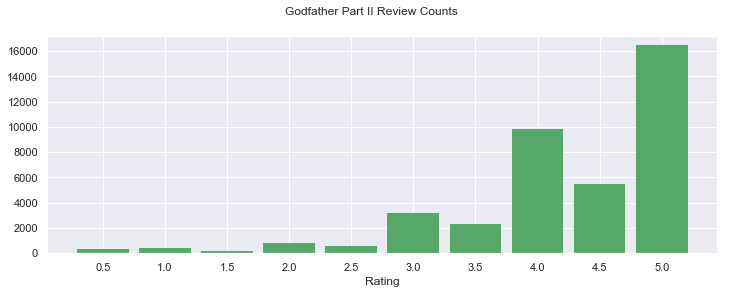

In [643]:
names = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
values = bigtest_avg.iloc[1153,6:16]

plt.figure(figsize=(12, 4))

plot = plt.bar(names, values)
plt.setp(plot,color='g', linewidth=2.0)
plt.suptitle('Godfather Part II Review Counts')
plt.xlabel('Rating')
plt.show();

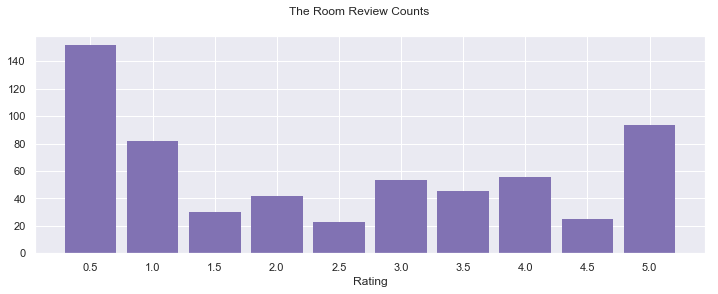

In [655]:
names = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
values_gb = bigtest_avg.iloc[11322,6:16]

plt.figure(figsize=(12, 4))

plot = plt.bar(names, values_gb)
plt.setp(plot,color='m', linewidth=2.0)
plt.suptitle('The Room Review Counts')
plt.xlabel('Rating')
plt.show();

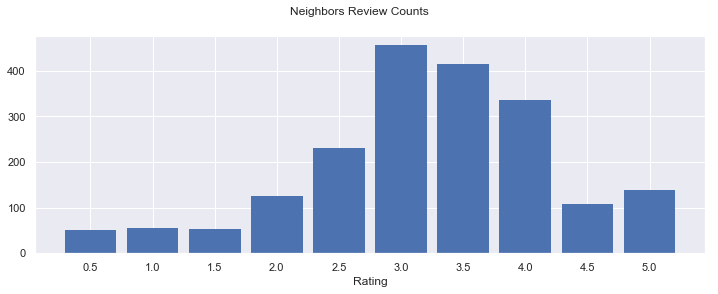

In [652]:
names = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
values_norm = bigtest_avg.iloc[13507,6:16]

plt.figure(figsize=(12, 4))

plot = plt.bar(names, values_norm)
plt.setp(plot,color='b', linewidth=2.0)
plt.suptitle('Neighbors Review Counts')
plt.xlabel('Rating')
plt.show();

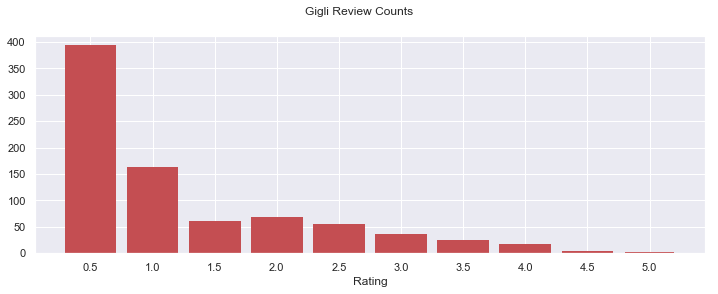

In [651]:
names = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
values_bad = bigtest_avg.iloc[6094,6:16]

plt.figure(figsize=(12, 4))

plot = plt.bar(names, values_bad)
plt.setp(plot,color='r', linewidth=2.0)
plt.suptitle('Gigli Review Counts')
plt.xlabel('Rating')
plt.show();

In [656]:
bigtest_avg.loc[bigtest_avg.imdbId == 'tt0033467']

index  movieId                title         genres     imdbId tmdbId  \
875    906      923  Citizen Kane (1941)  Drama|Mystery  tt0033467     15   

     (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
875         193.0         300.0         167.0         735.0         452.0   

     (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
875        2337.0        1634.0        5338.0        2330.0        8026.0   

     total_count  percent_0.5to1  percent_4.5to5  percent_polarity  \
875      21512.0        0.022917        0.481406         -0.458488   

     total_tails  Cluster  
875     0.504323        0

In [657]:
bigtest_avg.iloc[875,6:16]

(count, 0.5)     193
(count, 1.0)     300
(count, 1.5)     167
(count, 2.0)     735
(count, 2.5)     452
(count, 3.0)    2337
(count, 3.5)    1634
(count, 4.0)    5338
(count, 4.5)    2330
(count, 5.0)    8026
Name: 875, dtype: object

In [666]:
bigtest_avg['total_count'].sum()

27523748.0

In [667]:
len(bigtest_avg)

15751

In [668]:
df_master['total_count'].sum()

27753444.0

In [669]:
len(df_master)

53889

In [670]:
df_master.loc[df_master.imdbId == 'tt0097987']
# No Holds Barred

movieId                   title  genres     imdbId tmdbId  (count, 0.5)  \
4536     4630  No Holds Barred (1989)  Action  tt0097987  39002          14.0   

      (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  (count, 3.0)  \
4536          61.0          18.0          48.0          14.0          35.0   

      (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  total_count  \
4536           6.0          15.0           1.0           3.0        215.0   

      percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  
4536        0.348837        0.018605          0.330233     0.367442

In [671]:
df_master.loc[df_master.imdbId == 'tt0093692']

movieId                title        genres     imdbId tmdbId  \
6905     7016  Over the Top (1987)  Action|Drama  tt0093692   1825   

      (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
6905          37.0          51.0          53.0          84.0          87.0   

      (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
6905          98.0          48.0          31.0           7.0          16.0   

      total_count  percent_0.5to1  percent_4.5to5  percent_polarity  \
6905        512.0        0.171875        0.044922          0.126953   

      total_tails  
6905     0.216797

In [672]:
df_master.loc[df_master.imdbId == 'tt0114436']

movieId             title genres     imdbId tmdbId  (count, 0.5)  \
191      193  Showgirls (1995)  Drama  tt0114436  10802         671.0   

     (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  (count, 3.0)  \
191        2095.0         465.0        1712.0         519.0        1919.0   

     (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  total_count  \
191         360.0         684.0         109.0         403.0       8937.0   

     percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  
191          0.3095         0.05729           0.25221      0.36679

In [675]:
df_master.loc[df_master.imdbId == 'tt0117550']

movieId                      title  genres     imdbId tmdbId  \
1282     1311  Santa with Muscles (1996)  Comedy  tt0117550  31388   

      (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
1282           9.0          63.0           3.0          17.0           2.0   

      (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
1282          16.0           1.0           6.0           0.0          47.0   

      total_count  percent_0.5to1  percent_4.5to5  percent_polarity  \
1282        164.0        0.439024        0.286585          0.152439   

      total_tails  
1282      0.72561

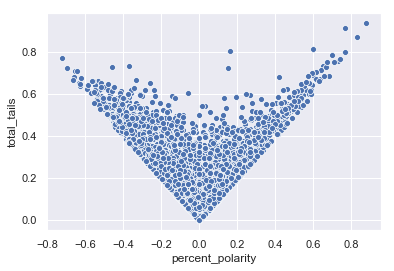

In [676]:
sns.scatterplot(lg_test['percent_polarity'], lg_test['total_tails'])

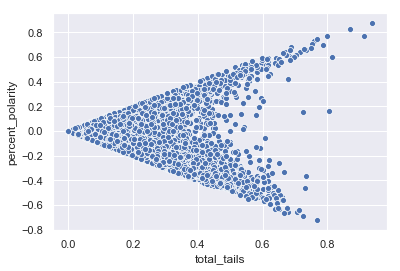

In [677]:
sns.scatterplot(lg_test['total_tails'],lg_test['percent_polarity'])